# Data analysis

### Import of libraries

In [1]:
import pandas as pd
import json
import numpy as np
# import scipy as sp
import matplotlib.pyplot as plt
import os, re, sys, glob, math
import warnings; warnings.simplefilter('ignore')
# import statsmodels.api as sm # import statsmodels
import lzma 
# import det64
from statistics import mean, median
from matplotlib.ticker import PercentFormatter
# from datetime import datetime

### Import of data

In [2]:
subfolder = '10rounds_all_deterministic_08282023'
outputpath = f'../output/{subfolder}/'
outputpathErrors = f'../output/{subfolder}/errors/'

### Cleaning data

In [3]:
def merge_all_files(keyword,subfolder='main'):
    all_files = glob.glob(os.path.join(r'../data/'+subfolder+'/', keyword + '*.csv'))
    return pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True, sort=True)

data = merge_all_files('all_apps_wide', subfolder=subfolder)
sessions = ['szfv4wj6', 'pixyr58z'] 
# Only keep those in-session who finished 
data = data[data['session.code'].isin(sessions) & data['participant._current_page_name'].isin(['Redirect'])]
data = data.dropna(subset=['participant.label'])
print(len(data))

75


## CQs

info_cost_cq_mistakes


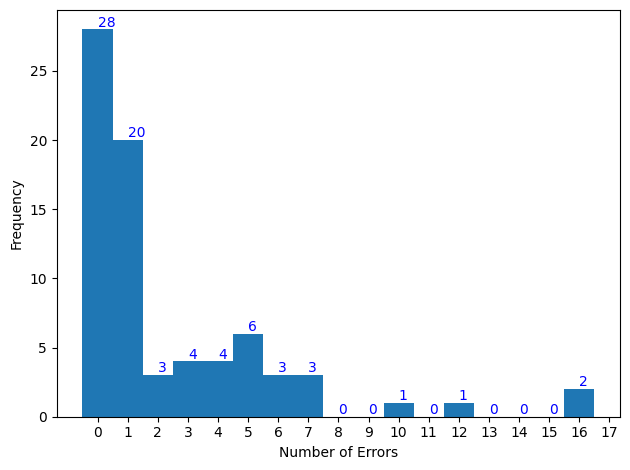

intro_cq_mistakes


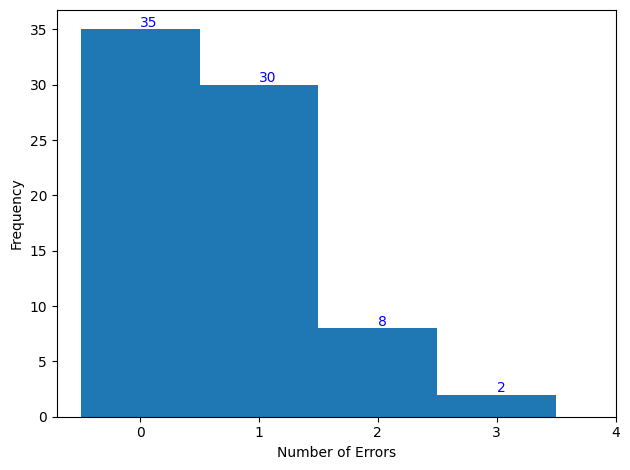

In [11]:
data['info_cost_cq_mistakes'] = data[['informational_cost.1.player.info_cost_cq_mistakes','informational_cost.2.player.info_cost_cq_mistakes','informational_cost.3.player.info_cost_cq_mistakes','informational_cost.4.player.info_cost_cq_mistakes','informational_cost.5.player.info_cost_cq_mistakes',
                                      'informational_cost.6.player.info_cost_cq_mistakes','informational_cost.7.player.info_cost_cq_mistakes','informational_cost.8.player.info_cost_cq_mistakes','informational_cost.9.player.info_cost_cq_mistakes','informational_cost.10.player.info_cost_cq_mistakes',
                                      'strategy_method.1.player.info_cost_cq_mistakes','strategy_method.2.player.info_cost_cq_mistakes','strategy_method.3.player.info_cost_cq_mistakes','strategy_method.4.player.info_cost_cq_mistakes','strategy_method.5.player.info_cost_cq_mistakes',
                                      'strategy_method.6.player.info_cost_cq_mistakes','strategy_method.7.player.info_cost_cq_mistakes','strategy_method.8.player.info_cost_cq_mistakes','strategy_method.9.player.info_cost_cq_mistakes','strategy_method.10.player.info_cost_cq_mistakes']].sum(axis=1)
# print(data[['info_cost_cq_mistakes', 'strategy_method.1.player.info_cost_cq_mistakes','strategy_method.2.player.info_cost_cq_mistakes','strategy_method.3.player.info_cost_cq_mistakes', 'informational_cost.1.player.info_cost_cq_mistakes','informational_cost.2.player.info_cost_cq_mistakes','informational_cost.3.player.info_cost_cq_mistakes']])
data['intro_cq_mistakes'] = data[['informational_cost.1.player.intro_cq_mistakes', 'strategy_method.1.player.intro_cq_mistakes']].sum(axis=1)
# print(data[['intro_cq_mistakes','informational_cost.1.player.intro_cq_mistakes', 'strategy_method.1.player.intro_cq_mistakes']])

col_list = []
col_list_names = []
for col in data[['info_cost_cq_mistakes','intro_cq_mistakes']]:
    col_list.append(data[col])
    col_list_names.append(col)

for var in col_list:
    try:
        print(var.name)
        fig, ax = plt.subplots()
        y = [int(i) for i in  var]
        xLabels = range(max(y)+2)
        x = np.arange(max(y)+2)
        ax.hist(y,x-0.5, width=1)
        plt.ylabel('Frequency')
        for i in range(max(y)+1):
            plt.text(i,y.count(i)+.2,y.count(i), color='blue')
        plt.xticks(x, xLabels)
        plt.xlabel('Number of Errors')
#         plt.title(f"{var.name[19:-9]}; N={len(var)}")
        plt.tight_layout()
#         plt.savefig(outputpathErrors+ var.name[10:-9] +'.png',dpi=1000)
        plt.show()
    except:
        print('Variable missing:', var.name)

In [4]:
data['cum_mistakes']=data[col_list_names].sum(axis=1)

maximum_mistakes_allowed = 100 
var = data[data['cum_mistakes']<maximum_mistakes_allowed]['cum_mistakes']
fig, ax = plt.subplots()
y = [int(i) for i in  var]
xLabels = range(max(y)+2)
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+1):
    plt.text(i,y.count(i)+.2,y.count(i), color='blue')
plt.xticks(x, xLabels)
plt.xlabel('Number of Errors')
plt.title(f"{var.name}; N={len(var)}")
plt.tight_layout()
# plt.savefig(outputpathErrors+ var.name +'.png',dpi=1000)
plt.show()

data = data[data['cum_mistakes']<maximum_mistakes_allowed]

NameError: name 'col_list_names' is not defined

### Destring param_rounds 

In [5]:
try:
    for ind in data.index:
        ini_list = data['participant.param_rounds'][ind]
        res = ini_list.strip('][').split(', ')
        data['participant.param_rounds'][ind] = res
    print(data['participant.param_rounds'])
except:
    print('you cannot run this code twice, and you have already run it. Run "cleaning data" again to be able to run this code')

# Create a column for each round, with that round's parameterization (which varies by participant)
for i in range(1,11):
    myList = []
    for ind in data.index:
        myList.append(int(data['participant.param_rounds'][ind][i-1]))
    #     print(myList,  data['participant.param_rounds'][ind])
    data[f'Round{i}Param'] = myList
#     print(data[f'Round{i}Param'].head(), data['participant.param_rounds'].head())

2      [1, 9, 7, 10, 3, 8, 4, 6, 5, 2]
3      [1, 7, 8, 10, 9, 5, 3, 4, 6, 2]
4      [1, 3, 6, 10, 5, 9, 7, 4, 8, 2]
5      [1, 9, 3, 6, 4, 10, 5, 8, 7, 2]
6      [1, 6, 5, 10, 9, 3, 8, 4, 7, 2]
                    ...               
95     [1, 4, 5, 10, 8, 3, 7, 6, 9, 2]
96     [1, 4, 8, 5, 7, 9, 10, 6, 3, 2]
97     [1, 10, 7, 4, 8, 9, 6, 5, 3, 2]
99     [1, 10, 7, 9, 8, 3, 4, 6, 5, 2]
100    [1, 4, 5, 8, 10, 6, 7, 9, 3, 2]
Name: participant.param_rounds, Length: 75, dtype: object


Create Columns for Computer type and Environment choice

In [8]:
# try:
#     for ind in data.index:
#         ini_list = data['participant.compType'][ind]
#         res = ini_list.strip('][').split(' ')
#         data['participant.compType'][ind] = res
#     print(data['participant.compType'])
# except:
#     print('you cannot run this code twice, and you have already run it. Run "cleaning data" again to be able to run this code')
    
# for i in range(1,11):
#     myList = []
#     for ind in data.index:
#         myList.append(int(data['participant.compType'][ind][i-1]))
#     data[f'comp_type_R{i}'] = myList

# for i in range(1,11):
#     myList = []
#     for ind in data.index:
#         if data['participant.treatment'][ind]=='strategy':
#             myList.append(int(data[f'strategy_method.{i}.player.environment_choice'][ind]))
#         else:
#             myList.append(int(data[f'informational_cost.{i}.player.environment_choice'][ind]))
#     data[f'EnvChoice_R{i}'] = myList

0     [0, 1, 1, 1, 1, 1, 1, 0, 0, 1]
1     [0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
2     [0, 0, 1, 1, 1, 0, 0, 0, 0, 1]
3     [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
4     [1, 1, 0, 1, 0, 0, 0, 1, 1, 0]
5     [1, 0, 1, 1, 1, 0, 1, 1, 0, 0]
6     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
7     [0, 1, 1, 1, 1, 0, 0, 1, 0, 1]
8     [1, 1, 1, 1, 0, 1, 0, 0, 0, 1]
9     [0, 1, 1, 0, 0, 1, 1, 1, 0, 0]
10    [0, 1, 1, 1, 0, 1, 1, 0, 1, 1]
11    [1, 0, 1, 0, 1, 1, 1, 1, 1, 1]
12    [1, 0, 1, 1, 0, 0, 1, 1, 0, 1]
13    [1, 0, 0, 0, 0, 1, 1, 1, 1, 0]
14    [0, 0, 0, 0, 1, 1, 0, 1, 1, 0]
15    [0, 1, 0, 1, 0, 1, 1, 1, 1, 1]
16    [0, 1, 1, 0, 1, 1, 1, 1, 0, 1]
17    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
18    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
19    [1, 1, 1, 1, 0, 0, 0, 1, 0, 1]
20    [1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
21    [0, 0, 1, 0, 1, 1, 0, 0, 0, 1]
22    [1, 0, 1, 1, 1, 0, 1, 0, 0, 1]
23    [0, 1, 0, 1, 1, 0, 0, 0, 1, 1]
24    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
25    [1, 1, 0, 1, 0, 1, 1, 0, 1, 0]
26    [1, 1, 0, 1, 0, 1, 0, 0, 0, 1]
2

###  Split data by treatments

In [6]:
# Slice data by treatments and parameterizations
data_det = data[data['participant.treatment']=='deterministic']
data_salient = data[data['participant.treatment']=='salient']
data_strategy = data[data['participant.treatment']=='strategy']
print(len(data_det))
print(len(data_salient))
print(len(data_strategy))

# rounds_num = 10
# for i in range(1,rounds_num+1):
#     det_sep = data_det[data_det[f'Round{i}Param']<7] # deterministic when separating is optimal
#     det_pool = data_det[data_det[f'Round{i}Param']>=6] # deterministic when pooling is optimal
#     salient_sep = data_salient[data_salient[f'Round{i}Param']<7] # salient when separating is optimal
#     salient_pool = data_salient[data_salient[f'Round{i}Param']>=6] # salient when pooling is optimal

# print(len(det_sep))
# print(len(det_pool))
# print(len(salient_sep))
# print(len(salient_pool))

38
18
19


In [7]:
print(data_det['informational_cost.1.player.environment_choice'].value_counts())
print(data_salient['informational_cost.1.player.environment_choice'].value_counts())
print(data_strategy['strategy_method.1.player.environment_choice'].value_counts())
# environment_choice is 1 if chose Separate and 0 if chose Pool

1.0    31
0.0     7
Name: informational_cost.1.player.environment_choice, dtype: int64
1.0    11
0.0     7
Name: informational_cost.1.player.environment_choice, dtype: int64
0.0    11
1.0     8
Name: strategy_method.1.player.environment_choice, dtype: int64


### Check lottery preferences 

[0.013333333333333334, 0.0, 0.04, 0.013333333333333334, 0.04, 0.0]


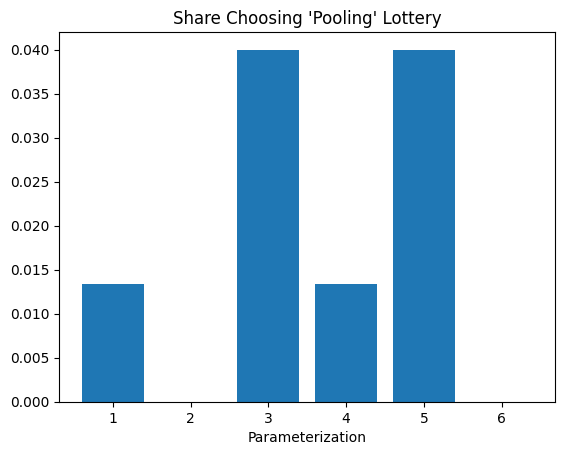

In [8]:
lottery_risky_share = []
for i in range(1,7):
    data[f'lottery.1.player.lottery{i}_det'] = data[f'lottery.1.player.lottery{i}_det'].replace(2, 0)
    lottery_risky_share += [np.mean(data[f'lottery.1.player.lottery{i}_det'])]
print(lottery_risky_share)

plt.bar(range(1,7), height=lottery_risky_share)
plt.title("Share Choosing 'Pooling' Lottery")
plt.xlabel("Parameterization")
plt.savefig(outputpath + f'lottery_choice.png',dpi=1000)
plt.show()

#### Are there people who always choose the Pooling lottery?

In [ ]:
# data['total_pool_lottery'] = data[f'lottery.1.player.lottery1']+data[f'lottery.1.player.lottery2']+data[f'lottery.1.player.lottery3']+data[f'lottery.1.player.lottery4']+data[f'lottery.1.player.lottery5']
# data['total_pool_lottery'].hist(bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5])
# plt.xticks(np.arange(0,7), ['0', '1', '2', '3', '4', '5', ''])  # Set text labels.
# plt.show()

In [ ]:
# lottery_risky_share = []
# data_temp = data[data['total_pool_lottery']>0]
# for i in range(1,7):
#     lottery_risky_share += [np.mean(data_temp[f'lottery.1.player.lottery{i}'])]
# print(lottery_risky_share)
# # 
# plt.bar(range(1,7), height=lottery_risky_share)
# plt.title("Share Choosing 'Separating' Lottery")
# plt.tight_layout()
# plt.xlabel("Parameterization")
# # plt.savefig(outputpath + f'lottery_choice.png',dpi=1000)
# plt.show()

In [11]:
# data = data[data['total_pool_lottery']>0]

In [ ]:
# for i in range(1,11): 
#     fig, ax = plt.subplots()
#     det_risk = data[data[f'Round{i}Param']<7] # plot only when pooling is a mistake
#     y = [int(j) for j in det_risk[f'informational_cost.{i}.player.environment_choice']] # plot only where risk-taking optimal
#     xLabels = ['Separate', 'Pool', '']
#     x = np.arange(max(y)+2)
#     ax.hist(y,x-0.5, width=1)
#     plt.ylabel('Frequency')
#     for j in range(max(y)+2):
#         plt.text(j,y.count(j)-1,str(y.count(j))+ ' (' + str(round(y.count(j)*100/len(y))) +'%)', color='white')
#     plt.xticks(x, xLabels)
#     plt.title(f'det: Revelation Choice R{i} N={len(y)}')
#     plt.tight_layout()
#     plt.savefig(outputpath + f'det_environment{i}.png',dpi=1000)
#     plt.show()

In [ ]:
# for i in range(2,11): 
#     fig, ax = plt.subplots()
#     det_risk = data[data[f'Round{i}Param']>5] # plot only when separating is a mistake
#     y = [int(j) for j in det_risk[f'informational_cost.{i}.player.environment_choice']] # plot only where risk-taking optimal
#     xLabels = ['Separate', 'Pool', '']
#     x = np.arange(max(y)+2)
#     ax.hist(y,x-0.5, width=1)
#     plt.ylabel('Frequency')
#     for j in range(max(y)+2):
#         plt.text(j,y.count(j)-1,str(y.count(j))+ ' (' + str(round(y.count(j)*100/len(y))) +'%)', color='white')
#     plt.xticks(x, xLabels)
#     plt.title(f'det: Revelation Choice R{i} N={len(y)}')
#     plt.tight_layout()
#     plt.savefig(outputpath + f'det_environment{i}.png',dpi=1000)
#     plt.show()

3.648

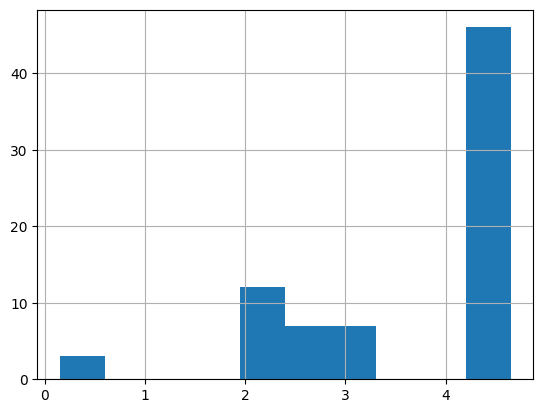

In [16]:
data['participant.payoff'].hist()
mean(data['participant.payoff'])

## Revelation by decision

6 params are Separating in deterministic in salient; 6 params are Separating in Strategy --- update this later!!!
[16.666666666666664, 0.0, 0.0, 16.666666666666664, 33.333333333333336, 0.0, 0.0, 40.0]
[22.22222222222222, 0.0, 33.33333333333333, 28.57142857142857, 0.0, 14.285714285714285, 0.0, 0.0, 0.0, 7.6923076923076925]
[6, 4, 3, 6, 3, 6, 4, 5]
[9, 3, 3, 7, 1, 7, 4, 3, 3, 13]
det: [81.57894736842105, 52.63157894736842, 55.00000000000001, 70.58823529411765, 50.0, 55.55555555555556, 73.68421052631578, 60.0, 57.14285714285714, 50.0] Salient: [61.111111111111114, 33.33333333333333, 50.0, 44.44444444444444, 25.0, 8.333333333333332, 9.090909090909092, 11.11111111111111, 25.0, 11.11111111111111] Strategy: [42.10526315789473, 22.22222222222222, 45.45454545454545, 41.66666666666667, 25.0, 23.076923076923077, 28.57142857142857, 36.36363636363637, 22.22222222222222, 26.31578947368421]


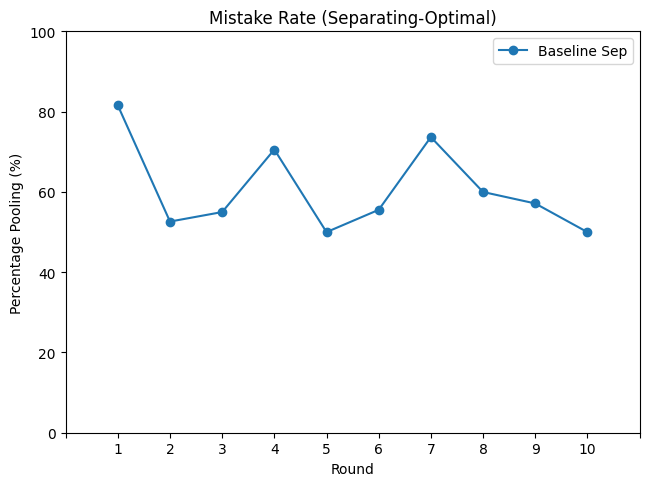

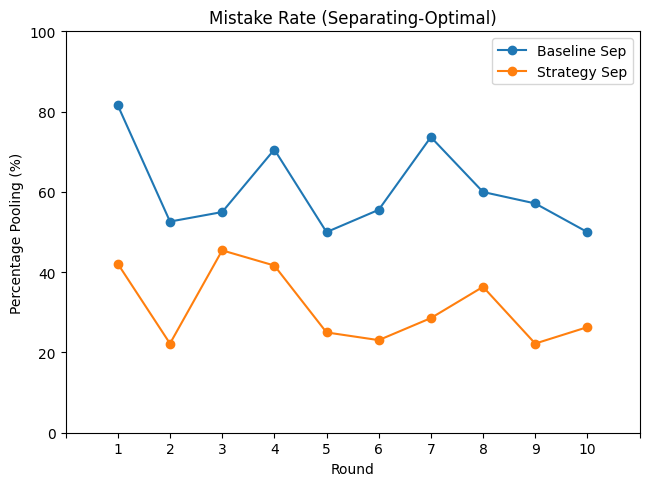

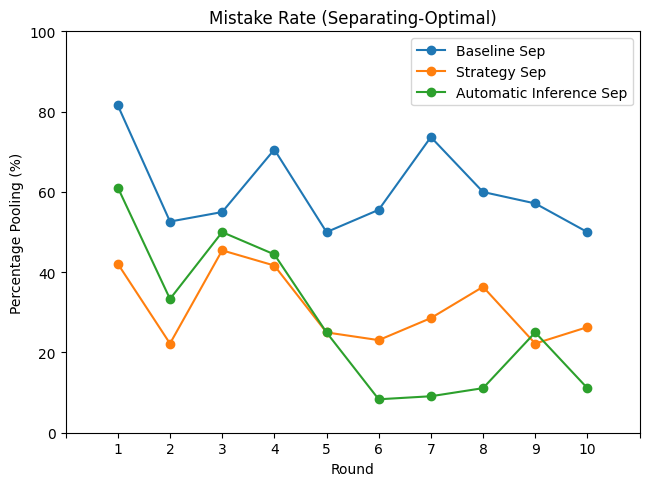

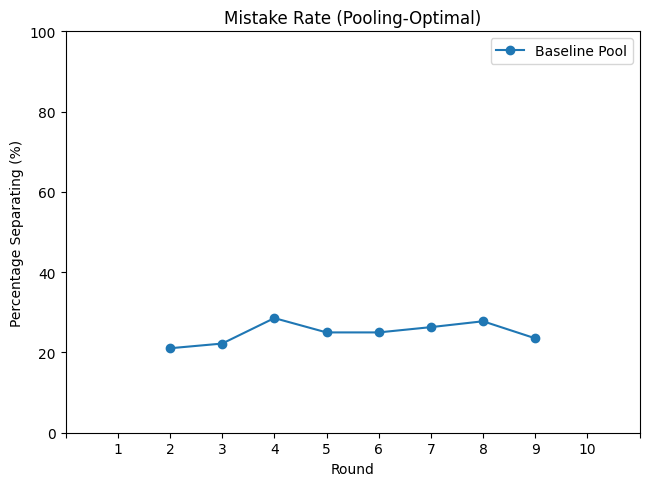

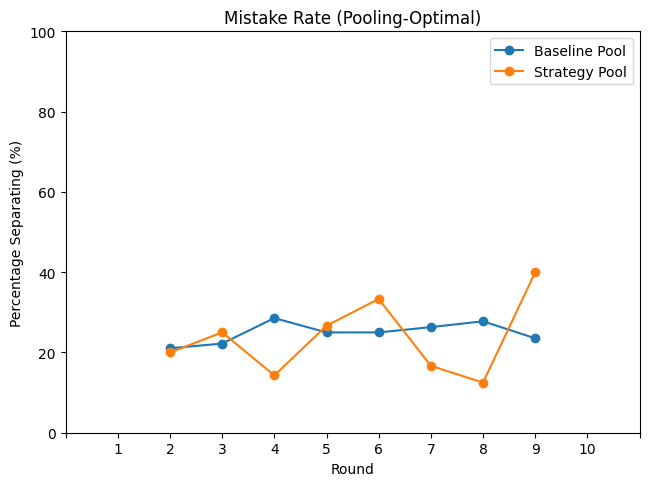

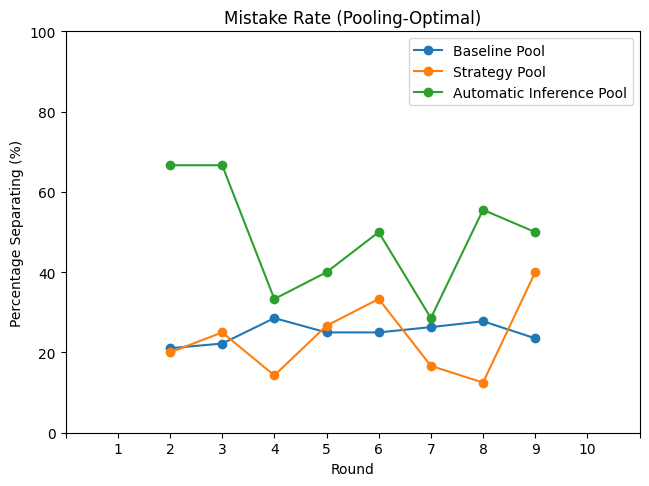

In [21]:
mist_det_sep = []
mist_det_pool = []
mist_salient_sep = []
mist_salient_pool = []
mist_strategy_sep = []
mist_strategy_pool = []
mist_strategy_sep2 = []
mist_strategy_pool2 = []
rounds_num = 10
lengths_det_sep=[]
lengths_det_pool=[]
lengths_salient_sep=[]
lengths_salient_pool=[]
lengths_strategy_sep=[]
lengths_strategy_pool=[]
lengths_strategy_sep2=[]
lengths_strategy_pool2=[]
print('6 params are Separating in deterministic in salient; 6 params are Separating in Strategy --- update this later!!!')

for i in range(1,rounds_num+1):
#   deterministic
    # det_sep = data_det[data_det[f'Round{i}Param']<7] # deterministic when separating is optimal
    # det_pool = data_det[data_det[f'Round{i}Param']>=6] # deterministic when pooling is optimal
    # det_risk = det[det[f'risk_taker_R{i}'] == 1] # this picks people who picked risky option in that round's lottery
    # det_risk = det_risk[det_risk[f'Round{i}Param'] != 5] # this kicks out those for whom pooling was optimal
    det_sep = data_det[data_det[f'Round{i}Param']<7] # deterministic when separating is optimal
    det_pool = data_det[data_det[f'Round{i}Param']>=7] # deterministic when pooling is optimal
    salient_sep = data_salient[data_salient[f'Round{i}Param']<7] # salient when separating is optimal
    salient_pool = data_salient[data_salient[f'Round{i}Param']>=7] # salient when pooling is optimal
    strategy_sep = data_strategy[data_strategy[f'Round{i}Param']<7] # strategy when separating is optimal
    strategy_pool = data_strategy[data_strategy[f'Round{i}Param']>=7] # strategy when pooling is optimal
    strategy_sep2 = data_strategy[(data_strategy[f'Round{i}Param']<7) & (data_strategy[f'strategy_method.{i}.player.bonusChoiceSep']==1) & (data_strategy[f'strategy_method.{i}.player.bonusChoicePool']==3)] # strategy when separating is optimal
    strategy_pool2 = data_strategy[(data_strategy[f'Round{i}Param']>=7) & (data_strategy[f'strategy_method.{i}.player.bonusChoiceSep']==3) & (data_strategy[f'strategy_method.{i}.player.bonusChoicePool']==3)] # strategy when pooling is optimal
    mist_environment = det_sep[f'informational_cost.{i}.player.environment_choice'].mean()*100
    mist_det_sep.append(mist_environment)
    lengths_det_sep.append(len(det_sep[det_sep[f'Round{i}Param']<7]))
    mist_environment = salient_sep[f'informational_cost.{i}.player.environment_choice'].mean()*100
    mist_salient_sep.append(mist_environment)
    lengths_salient_sep.append(len(salient_sep[salient_sep[f'Round{i}Param']<7]))
    mist_environment = strategy_sep[f'strategy_method.{i}.player.environment_choice'].mean()*100
    mist_strategy_sep.append(mist_environment)
    lengths_strategy_sep.append(len(strategy_sep[strategy_sep[f'Round{i}Param']<7]))
    mist_environment = strategy_sep2[f'strategy_method.{i}.player.environment_choice'].mean()*100
    mist_strategy_sep2.append(mist_environment)
    lengths_strategy_sep2.append(len(strategy_sep2[strategy_sep2[f'Round{i}Param']<7]))
    if i>1:
        mist_environment = (1-det_pool[f'informational_cost.{i}.player.environment_choice'].mean())*100
        mist_det_pool.append(mist_environment)
        lengths_det_pool.append(len(det_pool[det_pool[f'Round{i}Param']>=7]))
        mist_environment = (1-salient_pool[f'informational_cost.{i}.player.environment_choice'].mean())*100
        mist_salient_pool.append(mist_environment)
        lengths_salient_pool.append(len(salient_pool[salient_pool[f'Round{i}Param']>=7]))
        if i<rounds_num:
            mist_environment = (1-strategy_pool[f'strategy_method.{i}.player.environment_choice'].mean())*100
            mist_strategy_pool.append(mist_environment)
            lengths_strategy_pool.append(len(strategy_pool[strategy_pool[f'Round{i}Param']>=7]))
            mist_environment = (1-strategy_pool2[f'strategy_method.{i}.player.environment_choice'].mean())*100
            mist_strategy_pool2.append(mist_environment)
            lengths_strategy_pool2.append(len(strategy_pool2[strategy_pool2[f'Round{i}Param']>=7]))

print(mist_strategy_pool2)
print(mist_strategy_sep2)
print(lengths_strategy_pool2)
print(lengths_strategy_sep2)

# print('Chose risky in first round:', strategy[strategy['risk_taker_R1'] == 1]['risk_taker_R1'].count())
print('det:', mist_det_sep, 'Salient:', mist_salient_sep, 'Strategy:', mist_strategy_sep)

for fig in range(6): 
    # plt.plot(range(1,rounds_num+1), mist_det_sep, label=f'deterministic Sep N={lengths_det_sep}', marker="o")
    if fig<=2:
        plt.plot(range(1,rounds_num+1), mist_det_sep, label=f'Baseline Sep', marker="o")    # plt.plot(range(1,2), avgs_det, label=f'deterministic N={lengths_det[0]}', marker="o")


    if fig>0 and fig<=2:
        # plt.plot(range(1,rounds_num+1), mist_salient_sep, label=f'Salient Sep N={lengths_salient_sep}', marker="o")
        plt.plot(range(1,rounds_num+1), mist_strategy_sep,  label=f'Strategy Sep', marker="o")

    if fig>1 and fig<=2:
        # plt.plot(range(1,rounds_num+1), mist_salient_sep, label=f'Salient Sep N={lengths_salient_sep}', marker="o")
        plt.plot(range(1,rounds_num+1), mist_salient_sep,  label=f'Automatic Inference Sep', marker="o")

    # # plt.plot(range(1,2), avgs_salient, label=f'Salient N={lengths_salient[0]}', marker="o")
    if fig>2:
        # plt.plot(range(2,rounds_num+1), mist_det_pool, label=f'deterministic Pool N={lengths_det_pool}', marker="o")
        plt.plot(range(2,rounds_num+1), mist_det_pool, label=f'Baseline Pool', marker="o")

    if fig>3:
        # plt.plot(range(2,rounds_num+1), mist_salient_pool, label=f'Salient Pool N={lengths_salient_pool}', marker="o")
        plt.plot(range(2,rounds_num), mist_strategy_pool, label=f'Strategy Pool', marker="o")

    if fig>4:
        # plt.plot(range(2,rounds_num+1), mist_salient_pool, label=f'Salient Pool N={lengths_salient_pool}', marker="o")
        plt.plot(range(2,rounds_num+1), mist_salient_pool, label=f'Automatic Inference Pool', marker="o")



    # # plt.plot(range(1,rounds_num+1), avgs_strategy, label=f'Strategy Method N={lengths_strategy}', marker="o")
    # plt.plot(range(1,2), avgs_strategy, label=f'Strategy Method N={lengths_strategy[0]}', marker="o")

    plt.xlabel("Round")
    # plt.ylabel("Percentage Mistake (%)")
    plt.xlim(0, rounds_num+1)
    plt.xticks(np.arange(0,rounds_num+2), ['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', ''])  # Set text labels.
    plt.ylim(0, 100)
    # plt.axvline(x=5.5, linewidth=2, color = 'k')
    # plt.axhline(y=avgs_det_avg, xmin=0,xmax=0.5, linewidth=1, color = 'k')
    # plt.text(2.5,avgs_det_avg+3,str(round(avgs_det_avg,1))+'%')
    # plt.text(0.85,avgs_det[0]+3,str(round(avgs_det[0]))+'%')
    # plt.text(0.85,avgs_salient[0]+3,str(round(avgs_salient[0]))+'%')
    # plt.text(0.85,avgs_strategy[0]-4,str(round(avgs_strategy[0]))+'%')

    # plt.axhline(y=avgs_sal_avg, xmin=0,xmax=0.5, linewidth=1, color = 'k')
    # plt.text(2.5,avgs_sal_avg-4,str(round(avgs_sal_avg,1))+'%')

    plt.legend()
    plt.tight_layout()
    # plt.savefig(outputpath + 'environment_by_round_deterministic_R1.png',dpi=1000)
    # plt.savefig(outputpath + 'environment_by_round_deterministic.png',dpi=1000)
    # plt.savefig(outputpath + 'environment_by_round_salient_R1.png',dpi=1000)
    # plt.savefig(outputpath + 'environment_by_round_salient.png',dpi=1000)
    # plt.savefig(outputpath + 'environment_by_round_strategy_R1.png',dpi=1000)
    # plt.savefig(outputpath + 'environment_by_round_strategy.png',dpi=1000)
    if fig==0:
        plt.title(f'Mistake Rate (Separating-Optimal)')
        plt.ylabel("Percentage Pooling (%)")
        plt.savefig(outputpath + 'environment_by_round_deterministic_sep.png',dpi=1000, bbox_inches="tight")
    if fig==2:
        plt.title(f'Mistake Rate (Separating-Optimal)')
        plt.ylabel("Percentage Pooling (%)")
        plt.savefig(outputpath + 'environment_by_round_deterministic_strategy_salient_sep.png',dpi=1000, bbox_inches="tight")
    if fig==1:
        plt.title(f'Mistake Rate (Separating-Optimal)')
        plt.ylabel("Percentage Pooling (%)")
        plt.savefig(outputpath + 'environment_by_round_deterministic_strategy_sep.png',dpi=1000, bbox_inches="tight")
    if fig==3:
        plt.title(f'Mistake Rate (Pooling-Optimal)')
        plt.ylabel("Percentage Separating (%)")
        plt.savefig(outputpath + 'environment_by_round_deterministic_pool.png',dpi=1000, bbox_inches="tight")
    if fig==5:
        plt.title(f'Mistake Rate (Pooling-Optimal)')
        plt.ylabel("Percentage Separating (%)")
        plt.savefig(outputpath + 'environment_by_round_deterministic_strategy_salient_pool.png',dpi=1000, bbox_inches="tight")
    if fig==4:
        plt.title(f'Mistake Rate (Pooling-Optimal)')
        plt.ylabel("Percentage Separating (%)")
        plt.savefig(outputpath + 'environment_by_round_deterministic_strategy_pool.png',dpi=1000, bbox_inches="tight")
    # plt.tight_layout()
    plt.show()




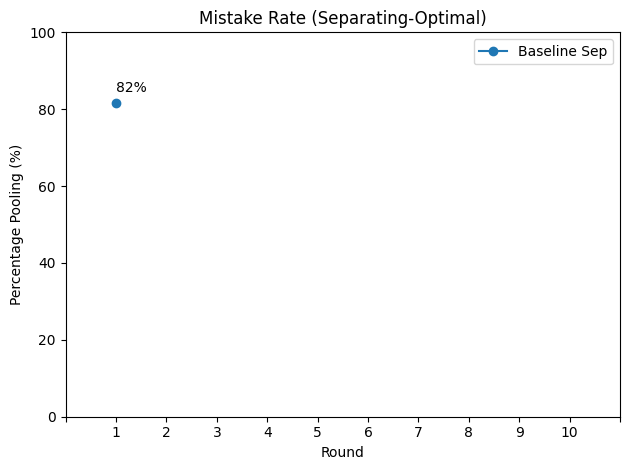

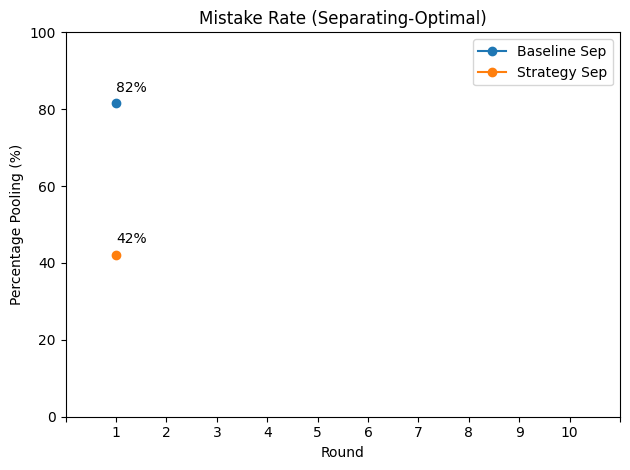

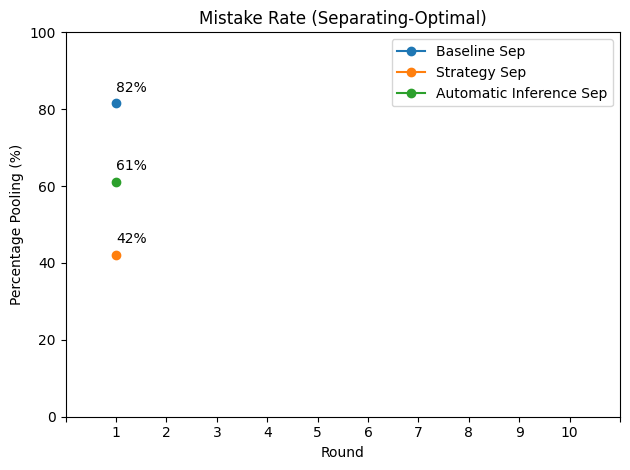

In [24]:
plt.plot([1], mist_det_sep[0], label=f'Baseline Sep', marker="o")
plt.xlabel("Round")
plt.xlim(0, rounds_num+1)
plt.xticks(np.arange(0,rounds_num+2), ['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', ''])  # Set text labels.
plt.ylim(0, 100)
plt.text(1,mist_det_sep[0]+3,str(round(mist_det_sep[0]))+'%')
plt.legend()
plt.title(f'Mistake Rate (Separating-Optimal)')
plt.ylabel("Percentage Pooling (%)")
plt.tight_layout()
plt.savefig(outputpath + 'environment_round_1_deterministic_sep.png',dpi=1000, bbox_inches="tight")
plt.show()

plt.plot([1], mist_det_sep[0], label=f'Baseline Sep', marker="o")
plt.plot([1], mist_strategy_sep[0], label=f'Strategy Sep', marker="o")
plt.xlabel("Round")
plt.xlim(0, rounds_num+1)
plt.xticks(np.arange(0,rounds_num+2), ['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', ''])  # Set text labels.
plt.ylim(0, 100)
plt.text(1,mist_det_sep[0]+3,str(round(mist_det_sep[0]))+'%')
plt.text(1,mist_strategy_sep[0]+3,str(round(mist_strategy_sep[0]))+'%')
plt.legend()
plt.title(f'Mistake Rate (Separating-Optimal)')
plt.ylabel("Percentage Pooling (%)")
plt.tight_layout()
plt.savefig(outputpath + 'environment_round_1_strategy_sep.png',dpi=1000, bbox_inches="tight")
plt.show()

plt.plot([1], mist_det_sep[0], label=f'Baseline Sep', marker="o")
plt.plot([1], mist_strategy_sep[0], label=f'Strategy Sep', marker="o")
plt.plot([1], mist_salient_sep[0], label=f'Automatic Inference Sep', marker="o")
plt.xlabel("Round")
plt.xlim(0, rounds_num+1)
plt.xticks(np.arange(0,rounds_num+2), ['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', ''])  # Set text labels.
plt.ylim(0, 100)
plt.text(1,mist_det_sep[0]+3,str(round(mist_det_sep[0]))+'%')
plt.text(1,mist_salient_sep[0]+3,str(round(mist_salient_sep[0]))+'%')
plt.text(1,mist_strategy_sep[0]+3,str(round(mist_strategy_sep[0]))+'%')
plt.legend()
plt.title(f'Mistake Rate (Separating-Optimal)')
plt.ylabel("Percentage Pooling (%)")
plt.tight_layout()
plt.savefig(outputpath + 'environment_round_1_salient_sep.png',dpi=1000, bbox_inches="tight")
plt.show()

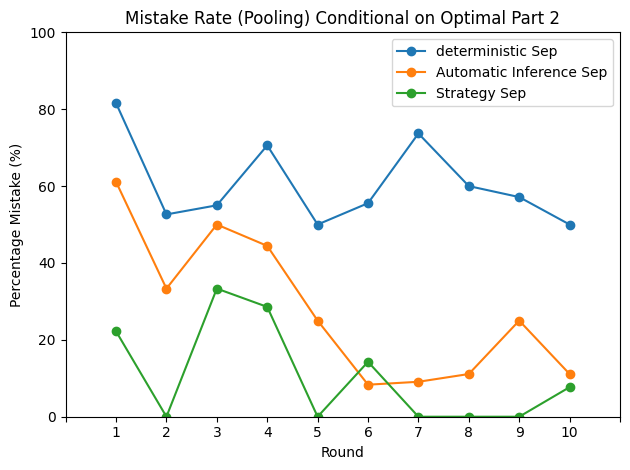

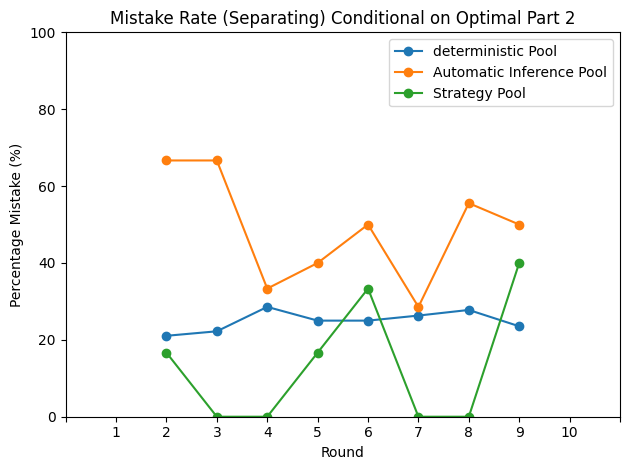

In [19]:

plt.xlabel("Round")
plt.ylabel("Percentage Mistake (%)")
plt.xlim(0, rounds_num+1)
plt.xticks(np.arange(0,rounds_num+2), ['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', ''])  # Set text labels.
plt.ylim(0, 100)
plt.title(f'Mistake Rate (Pooling) Conditional on Optimal Part 2')
plt.tight_layout()
plt.plot(range(1,rounds_num+1), mist_det_sep, label=f'deterministic Sep', marker="o")
plt.plot(range(1,rounds_num+1), mist_salient_sep, label=f'Automatic Inference Sep', marker="o")
# plt.plot(range(2,rounds_num), mist_strategy_pool2, label=f'Strategy Pool', marker="o")
plt.plot(range(1,rounds_num+1), mist_strategy_sep2, label=f'Strategy Sep', marker="o")
plt.legend()
plt.savefig(outputpath + 'environment_by_round_strategy_opt_part2_sep.png',dpi=1000)
plt.show()

plt.xlabel("Round")
plt.ylabel("Percentage Mistake (%)")
plt.xlim(0, rounds_num+1)
plt.xticks(np.arange(0,rounds_num+2), ['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', ''])  # Set text labels.
plt.ylim(0, 100)
plt.title(f'Mistake Rate (Separating) Conditional on Optimal Part 2')
plt.tight_layout()
plt.plot(range(2,rounds_num+1), mist_det_pool, label=f'deterministic Pool', marker="o")
plt.plot(range(2,rounds_num+1), mist_salient_pool, label=f'Automatic Inference Pool', marker="o")
plt.plot(range(2,rounds_num), mist_strategy_pool2, label=f'Strategy Pool', marker="o")
# plt.plot(range(1,rounds_num+1), mist_strategy_sep2, label=f'Strategy Sep', marker="o")
plt.legend()
plt.savefig(outputpath + 'environment_by_round_strategy_opt_part2_pool.png',dpi=1000)
plt.show()

### Let's look at those who see parameterization 5, do they make mistakes?

In [ ]:
# for i in range(1,rounds_num+1):
#     print(det[det[f'Round{i}Param'] == 5][[f'risk_taker_R{i}', f'informational_cost.{i}.player.environment_choice']])
# #     print(det[[f'Round{i}Param', f'risk_taker_R{i}']])

### How much do people pool when its optimal to pool? - in det

In [ ]:
# avgs_det = []
# for i in range(1,6):
# #     deterministic
#     det_risk = det[det[f'risk_taker_R{i}'] == 0] # this picks people who picked safe option in that round's lottery (for whom pooling here is optimal)
#     det_risk = det_risk[(det_risk[f'Round{i}Param'] == 5)] # this picks those for whom pooling was optimal
#     avg_environment = det_risk[f'informational_cost.{i}.player.environment_choice'].mean()
#     avgs_det.append(avg_environment)
#     print(len(det_risk))
# print(avgs_det)
# print(sum(avgs_det)/len(avgs_det))

# avgs_salient = []
# for i in range(1,6):
# #     SALIENT
#     salient_risk = salient[salient[f'risk_taker_R{i}'] == 0] # this picks people who picked safe option in that round's lottery (for whom pooling here is optimal)
#     salient_risk = salient_risk[(salient_risk[f'Round{i}Param'] == 5)] # this picks those for whom pooling was optimal
#     avg_environment = salient_risk[f'informational_cost.{i}.player.environment_choice'].mean()
#     avgs_salient.append(avg_environment)
#     print(len(salient_risk))
# print(avgs_salient)
# print(sum(avgs_salient)/len(avgs_salient))

# avgs_strategy = []
# for i in range(1,6):
# #     SALIENT
#     strategy_risk = strategy[strategy[f'risk_taker_R{i}'] == 0] # this picks people who picked safe option in that round's lottery (for whom pooling here is optimal)
#     strategy_risk = strategy_risk[(strategy_risk[f'Round{i}Param'] == 5)] # this picks those for whom pooling was optimal
#     avg_environment = strategy_risk[f'strategy_method.{i}.player.environment_choice'].mean()
#     avgs_strategy.append(avg_environment)
#     print(len(strategy_risk))
# print(avgs_strategy)
# print(sum(avgs_strategy)/len(avgs_strategy))

### Do people who (always) separate when its optimal to separate, also pool when its optimal to pool? - in det

In [ ]:
# for i in range(1,6):
#     det[f'optimal{i}'] = np.nan
#     for ind in det.index:
#         det[f'optimal{i}'][ind] = 1 if (det[f'risk_taker_R{i}'][ind]==1 and det[f'informational_cost.{i}.player.environment_choice'][ind]==0) else 0
#         det[f'optimal{i}'][ind] = 1 if (det[f'risk_taker_R{i}'][ind]==0 and det[f'informational_cost.{i}.player.environment_choice'][ind]==1) else det[f'optimal{i}'][ind]
#     print(det[[f'optimal{i}',f'risk_taker_R{i}',f'informational_cost.{i}.player.environment_choice']])
# #         if det[f'optimal{i}'][ind]:
# #             det[f'optimal{i}'] = 0  


In [ ]:
# #  pooling_round1 and pooling_round2 pick the rounds in which pooling is optimal for each subject
# det['pooling_round1'] = np.nan
# for i in range(1,6):
#     for ind in det.index:
#         if det[f'Round{i}Param'][ind] == 5:
#             det['pooling_round1'][ind] = i

# det['always_optimally_separated'] = np.nan
# for ind in det.index:
#     counter = 0
#     a = det['pooling_round1'][ind]
#     rounds = [1,2,3,4,5]
#     rounds.remove(a)
#     for i in rounds:
#         if det[f'optimal{i}'][ind]==1 and det[f'risk_taker_R{i}'][ind]==1:
#             counter +=1
#     det['always_optimally_separated'][ind]=1 if counter == 4 else 0

# det_optimally_separated = det[det['always_optimally_separated'] == 1] # this picks people who chose optimally 
# pooling_det = []
# for ind in det_optimally_separated.index:
#     a = int(det_optimally_separated['pooling_round1'][ind])
#     choice_in_pooling = det_optimally_separated[f'informational_cost.{a}.player.environment_choice'][ind]
#     pooling_det.append(choice_in_pooling)
# print(len(det_optimally_separated),len(pooling_det),pooling_det)
# print('Fraction of the 20 decisions in which they pool when its optimal, for people who always do optimal:', sum(pooling_det)/len(pooling_det))

In [ ]:
# avgs_det = []
# for i in range(1,6):
# #     deterministic
#     avg_environment = det[f'optimal{i}'].mean()*100
#     avgs_det.append(avg_environment)

# plt.plot(range(1,6), avgs_det, label='deterministic - Optimal', marker="o")

# plt.xlabel("Round")
# plt.ylabel("Percentage Optimal (%)")
# plt.xlim(1, 5)
# plt.xticks(np.arange(1,6), range(1,6))  # Set text labels.
# plt.ylim(0, 100)
# plt.axvline(x=5.5, linewidth=2, color = 'k')
# plt.legend()
# plt.title('Optimal Revelation By Round')
# plt.tight_layout()
# # plt.savefig(outputpath + 'environment_by_round.png',dpi=1000)
# plt.show()

## Let's look at parameterization to check whether we learn anything from that

In [ ]:
# for i in range(1,6):    
#     fig, ax = plt.subplots()
#     data_risk = salient[salient[f'risk_taker_R{i}'] == 1] # plot only for the subsample of risk-takers
# #     data_risk = data
#     y = [int(i) for i in data_risk[f'Round{i}Param']] # plot only where risk-taking optimal
# #     print(y)
#     xLabels = ['', 'Params 1', 'Params 2', 'Params 3', 'Params 4', 'Params 5', '']
#     x = np.arange(7)
#     ax.hist(y,x-0.5, width=1)
#     plt.ylabel('Frequency')
#     for j in range(max(y)+2):
#         plt.text(j-0.35,y.count(j)-1,str(y.count(j))+ ' (' + str(round(y.count(j)*100/len(y))) +'%)', color='white')
#     plt.xticks(x, xLabels)
#     plt.title(f'Parameterization in Round {i} N={len(y)}')
#     plt.tight_layout()
# #     plt.savefig(outputpath + f'Strategy_environment{i}.png',dpi=1000)
#     plt.show()

## Bonus Choice

#### Destring compTypes, chosen_decisions, and environment_choice

In [29]:
try:
    for ind in data.index:
        ini_list = data['participant.compType'][ind]
        res = ini_list.strip('][').split(' ')
        data['participant.compType'][ind] = res
    print(data['participant.compType'])
except:
    print('you cannot run this code twice, and you have already run it. Run "cleaning data" again to be able to run this code')
# try:
#     for ind in data.index:
#         ini_list = data['participant.chosen_decisions'][ind]
#         res = ini_list.strip(')(').split(', ')
#         data['participant.chosen_decisions'][ind] = res
#     print(data['participant.chosen_decisions'])
# except:
#     print('you cannot run this code twice, and you have already run it. Run "cleaning data" again to be able to run this code')

you cannot run this code twice, and you have already run it. Run "cleaning data" again to be able to run this code


##### Create 5 columns, each with compType for each round

In [30]:
for i in range(1,rounds_num+1):
    myList = []
    for ind in data.index:
        myList.append(int(data[f'participant.compType'][ind][i-1]))
    data[f'comp_type_R{i}'] = myList
# det = data[data['participant.treatment']== 'det']
# salient = data[data['participant.treatment']== 'salient']
# strategy = data[data['participant.treatment']== 'strategy']

### Part 2: Bonus Choice - Do people know what to do with the information?


#### deterministic

In [20]:
for i in range(1,rounds_num+1):
    myList = []
    for ind in data_det.index:
        myList.append(int(data_det[f'informational_cost.{i}.player.environment_choice'][ind]))
    data_det[f'EnvChoice_R{i}'] = myList
    myList = []
    for ind in data_salient.index:
        myList.append(int(data_salient[f'informational_cost.{i}.player.environment_choice'][ind]))
    data_salient[f'EnvChoice_R{i}'] = myList

In [ ]:
# avgs_pool = []
# for i in range(1,6):
#     det_pool = data_det[(data_det[f'EnvChoice_R{i}']==1) & (data_det[f'Round{i}Param']<7)] #  deterministic when separating is optimal
#     bonus_choice = det_pool[f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
#     avg_pooling = bonus_choice.mean()*100
#     avgs_pool.append(avg_pooling)
# #     print(det_pool[f'informational_cost.{i}.player.bonusChoice'], bonus_choice)
#     print('N=', len(bonus_choice))
# print(avgs_pool)
# plt.plot(range(1,6), avgs_pool, label='deterministic - Hiring choice for those who pool', marker="o")

# plt.xlabel("Round")
# plt.ylabel("Percentage Hiring (%)")
# plt.xlim(1, 5)
# plt.xticks(np.arange(1,6), range(1,6))  # Set text labels.
# plt.ylim(0, 100)
# plt.axvline(x=5.5, linewidth=2, color = 'k')
# # plt.legend()
# plt.title('deterministic: Hiring if Pooled, By Round; N=()')
# plt.tight_layout()
# # plt.savefig(outputpath + 'environment_by_round.png',dpi=1000)
# plt.show()

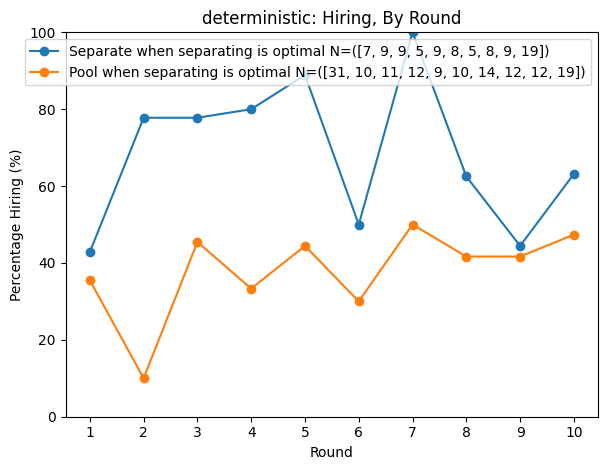

KeyError: 'cum_mistakes'

In [21]:
# for fig in range(2):
#  SEPARATE
avgs_sep = []
lengths = []
for i in range(1,rounds_num+1):
    det_sep = data_det[(data_det[f'EnvChoice_R{i}']==0) & (data_det[f'Round{i}Param']<7)] #  deterministic when separating is optimal
    bonus_choice = det_sep[f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    bonus_choice = bonus_choice.replace(2, 0) # Only count hiring Good computer
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
    # print('N=', len(bonus_choice))
    lengths.append(len(bonus_choice))
# print(avgs_sep)
plt.plot(range(1,rounds_num+1), avgs_sep, label=f'Separate when separating is optimal N=({lengths})', marker="o")
# plt.plot(range(1,rounds_num+1), avgs_sep, label=f'Separate when separating is optimal', marker="o")


    # #  SEPARATE GOOD
    # avgs_sep = []
    # lengths = []
    # for i in range(1,rounds_num+1):
    #     det_sep = data_det[(data_det[f'EnvChoice_R{i}']==0) & (data_det[f'Round{i}Param']<7)] #  deterministic when separating is optimal
    #     bonus_choice = det_sep[det_sep[f'comp_type_R{i}']==1][f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    #     avg_separating = bonus_choice.mean()*100
    #     avgs_sep.append(avg_separating)
    #     # print('N=', len(bonus_choice))
    #     lengths.append(len(bonus_choice))
    # # print(avgs_sep)
    # # plt.plot(range(1,rounds_num+1), avgs_sep, label=f'See Good Quality N=({lengths})', marker="o")
    # plt.plot(range(1,rounds_num+1), avgs_sep, label=f'See Good Quality', marker="o")


    # if fig>0:
#  POOL
lengths = []
avgs_pool = []
for i in range(1,rounds_num+1):
    det_pool = data_det[(data_det[f'EnvChoice_R{i}']==1) & (data_det[f'Round{i}Param']<7)] #  deterministic when separating is optimal
    bonus_choice = det_pool[f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    bonus_choice = bonus_choice.replace(2, 1) # Count hiring any computer
    avg_pooling = bonus_choice.mean()*100
    avgs_pool.append(avg_pooling)
#     print(det_pool[f'informational_cost.{i}.player.bonusChoice'], bonus_choice)
    # print('N=', len(bonus_choice))
    lengths.append(len(bonus_choice))
# print(avgs_pool)
plt.plot(range(1,rounds_num+1), avgs_pool, label=f'Pool when separating is optimal N=({lengths})', marker="o")
# plt.plot(range(1,rounds_num+1), avgs_pool, label=f'Pool when separating is optimal', marker="o")


plt.xlabel("Round")
plt.ylabel("Percentage Hiring (%)")
# plt.xlim(1, 5)
plt.xticks(np.arange(1,rounds_num+1), range(1,rounds_num+1))  # Set text labels.
plt.ylim(0, 100)
# plt.axvline(x=5.5, linewidth=2, color = 'k')
plt.legend()
plt.title(f'deterministic: Hiring, By Round')
plt.tight_layout()
# plt.savefig(outputpath + 'deterministic_bonus_choice_by_round.png',dpi=1000)
# if fig==0:
plt.savefig(outputpath + 'deterministic_bonus_choice_by_round.png',dpi=1000)
plt.show()

# Participants with few mistakes
#  SEPARATE
data_det_cqpass = data_det[data_det['cum_mistakes']<2]
avgs_sep = []
lengths = []
for i in range(1,rounds_num+1):
    det_sep = data_det_cqpass[(data_det_cqpass[f'EnvChoice_R{i}']==0) & (data_det_cqpass[f'Round{i}Param']<7)] #  deterministic when separating is optimal
    bonus_choice = det_sep[f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    bonus_choice = bonus_choice.replace(2, 0) # Only count hiring Good computer
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
    # print('N=', len(bonus_choice))
    lengths.append(len(bonus_choice))
# print(avgs_sep)
plt.plot(range(1,rounds_num+1), avgs_sep, label=f'Separate when separating is optimal N=({lengths})', marker="o")
# plt.plot(range(1,rounds_num+1), avgs_sep, label=f'Separate when separating is optimal', marker="o")


    # #  SEPARATE GOOD
    # avgs_sep = []
    # lengths = []
    # for i in range(1,rounds_num+1):
    #     det_sep = data_det[(data_det[f'EnvChoice_R{i}']==0) & (data_det[f'Round{i}Param']<7)] #  deterministic when separating is optimal
    #     bonus_choice = det_sep[det_sep[f'comp_type_R{i}']==1][f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    #     avg_separating = bonus_choice.mean()*100
    #     avgs_sep.append(avg_separating)
    #     # print('N=', len(bonus_choice))
    #     lengths.append(len(bonus_choice))
    # # print(avgs_sep)
    # # plt.plot(range(1,rounds_num+1), avgs_sep, label=f'See Good Quality N=({lengths})', marker="o")
    # plt.plot(range(1,rounds_num+1), avgs_sep, label=f'See Good Quality', marker="o")


    # if fig>0:
#  POOL
lengths = []
avgs_pool = []
for i in range(1,rounds_num+1):
    det_pool = data_det[(data_det[f'EnvChoice_R{i}']==1) & (data_det[f'Round{i}Param']<7)] #  deterministic when separating is optimal
    bonus_choice = det_pool[f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    bonus_choice = bonus_choice.replace(2, 1) # Count hiring any computer
    avg_pooling = bonus_choice.mean()*100
    avgs_pool.append(avg_pooling)
#     print(det_pool[f'informational_cost.{i}.player.bonusChoice'], bonus_choice)
    # print('N=', len(bonus_choice))
    lengths.append(len(bonus_choice))
# print(avgs_pool)
plt.plot(range(1,rounds_num+1), avgs_pool, label=f'Pool when separating is optimal N=({lengths})', marker="o")
# plt.plot(range(1,rounds_num+1), avgs_pool, label=f'Pool when separating is optimal', marker="o")


plt.xlabel("Round")
plt.ylabel("Percentage Hiring (%)")
# plt.xlim(1, 5)
plt.xticks(np.arange(1,rounds_num+1), range(1,rounds_num+1))  # Set text labels.
plt.ylim(0, 100)
# plt.axvline(x=5.5, linewidth=2, color = 'k')
plt.legend()
plt.title(f'deterministic: Hiring, By Round')
plt.tight_layout()
# plt.savefig(outputpath + 'deterministic_bonus_choice_by_round.png',dpi=1000)
# if fig==0:
plt.savefig(outputpath + 'deterministic_bonus_choice_by_round.png',dpi=1000)
plt.show()

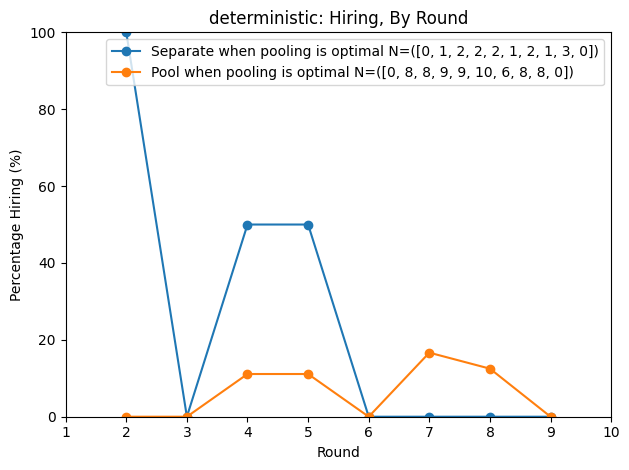

In [18]:
# for fig in range(2):
#  SEPARATE
avgs_sep = []
lengths = []
for i in range(1,rounds_num+1):
    det_sep = data_det[(data_det[f'EnvChoice_R{i}']==0) & (data_det[f'Round{i}Param']>=7)] #  deterministic when pooling is optimal
    bonus_choice = det_sep[f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    bonus_choice = bonus_choice.replace(2, 1) # Count hiring any computer
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
    # print('N=', len(bonus_choice))
    lengths.append(len(bonus_choice))
# print(avgs_sep)
plt.plot(range(1,rounds_num+1), avgs_sep, label=f'Separate when pooling is optimal N=({lengths})', marker="o")
# plt.plot(range(1,rounds_num+1), avgs_sep, label=f'Separate when pooling is optimal', marker="o")


    # #  SEPARATE GOOD
    # avgs_sep = []
    # lengths = []
    # for i in range(1,rounds_num+1):
    #     det_sep = data_det[(data_det[f'EnvChoice_R{i}']==0) & (data_det[f'Round{i}Param']<7)] #  deterministic when separating is optimal
    #     bonus_choice = det_sep[det_sep[f'comp_type_R{i}']==1][f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    #     avg_separating = bonus_choice.mean()*100
    #     avgs_sep.append(avg_separating)
    #     # print('N=', len(bonus_choice))
    #     lengths.append(len(bonus_choice))
    # # print(avgs_sep)
    # # plt.plot(range(1,rounds_num+1), avgs_sep, label=f'See Good Quality N=({lengths})', marker="o")
    # plt.plot(range(1,rounds_num+1), avgs_sep, label=f'See Good Quality', marker="o")


    # if fig>0:
#  POOL
lengths = []
avgs_pool = []
for i in range(1,rounds_num+1):
    det_pool = data_det[(data_det[f'EnvChoice_R{i}']==1) & (data_det[f'Round{i}Param']>=7)] #  deterministic when pooling is optimal
    bonus_choice = det_pool[f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    bonus_choice = bonus_choice.replace(2, 1) # Count hiring any computer
    avg_pooling = bonus_choice.mean()*100
    avgs_pool.append(avg_pooling)
#     print(det_pool[f'informational_cost.{i}.player.bonusChoice'], bonus_choice)
    # print('N=', len(bonus_choice))
    lengths.append(len(bonus_choice))
# print(avgs_pool)
plt.plot(range(1,rounds_num+1), avgs_pool, label=f'Pool when pooling is optimal N=({lengths})', marker="o")
# plt.plot(range(1,rounds_num+1), avgs_pool, label=f'Pool when pooling is optimal', marker="o")


plt.xlabel("Round")
plt.ylabel("Percentage Hiring (%)")
# plt.xlim(1, 5)
plt.xticks(np.arange(1,rounds_num+1), range(1,rounds_num+1))  # Set text labels.
plt.ylim(0, 100)
# plt.axvline(x=5.5, linewidth=2, color = 'k')
plt.legend()
plt.title(f'deterministic: Hiring, By Round')
plt.tight_layout()
# plt.savefig(outputpath + 'deterministic_bonus_choice_by_round.png',dpi=1000)
# if fig==0:
plt.savefig(outputpath + 'deterministic_bonus_choice_by_round2.png',dpi=1000)
plt.show()

### Salient

In [ ]:
# for i in range(1,6):
#     myList = []
#     for ind in salient.index:
#         myList.append(int(salient[f'informational_cost.{i}.player.environment_choice'][ind]))
#     salient[f'EnvChoice_R{i}'] = myList

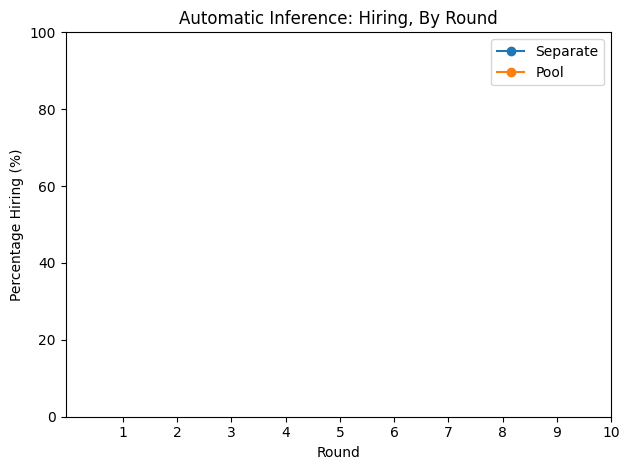

In [19]:
# for fig in range(2):
#  SEPARATE BAD
lengths = []
avgs_sep = []
for i in range(1, rounds_num+1):
    salient_sep = data_salient[(data_salient[f'EnvChoice_R{i}']==0) & (data_salient[f'Round{i}Param']<7)]
    bonus_choice = salient_sep[f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    bonus_choice = bonus_choice.replace(2, 0) # Only count hiring Good computer
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
    lengths.append(len(bonus_choice))
# print(avgs_sep)
# plt.plot(range(1, rounds_num+1), avgs_sep, label=f'See Bad Quality N={lengths}', marker="o")
plt.plot(range(1, rounds_num+1), avgs_sep, label=f'Separate', marker="o")


    # #  SEPARATE GOOD
    # lengths = []
    # avgs_sep = []
    # for i in range(1, rounds_num+1):
    #     salient_sep = data_salient[(data_salient[f'EnvChoice_R{i}']==0) & (data_salient[f'Round{i}Param']<7)]
    #     bonus_choice = salient_sep[salient_sep[f'comp_type_R{i}']==1][f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    #     avg_separating = bonus_choice.mean()*100
    #     avgs_sep.append(avg_separating)
    #     lengths.append(len(bonus_choice))
    # # print(avgs_sep)
    # # plt.plot(range(1, rounds_num+1), avgs_sep, label=f'See Good Quality N={lengths}', marker="o")
    # plt.plot(range(1, rounds_num+1), avgs_sep, label=f'See Good Quality', marker="o")


# if fig>0:
#  POOL
avgs_pool = []
lengths = []
for i in range(1, rounds_num+1):
    salient_pool = data_salient[(data_salient[f'EnvChoice_R{i}']==1) & (data_salient[f'Round{i}Param']<7)]
    bonus_choice = salient_pool[f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    bonus_choice = bonus_choice.replace(2, 1) # Count hiring any computer
    avg_pooling = bonus_choice.mean()*100
    avgs_pool.append(avg_pooling)
#     print(det_pool[f'informational_cost.{i}.player.bonusChoice'], bonus_choice)
    lengths.append(len(bonus_choice))
# print(avgs_pool)
# plt.plot(range(1, rounds_num+1), avgs_pool, label=f'Pool N={lengths}', marker="o")
plt.plot(range(1, rounds_num+1), avgs_pool, label=f'Pool', marker="o")


plt.xlabel("Round")
plt.ylabel("Percentage Hiring (%)")
# plt.xlim(1, 5)
plt.xticks(np.arange(1,rounds_num+1), range(1, rounds_num+1))  # Set text labels.
plt.ylim(0, 100)
# plt.axvline(x=5.5, linewidth=2, color = 'k')
plt.legend()
plt.title(f'Automatic Inference: Hiring, By Round')
plt.tight_layout()
# plt.savefig(outputpath + 'salient_bonus_choice_by_round.png',dpi=1000)
# if fig==0:
plt.savefig(outputpath + 'salient_bonus_choice_by_round.png',dpi=1000)
plt.show()

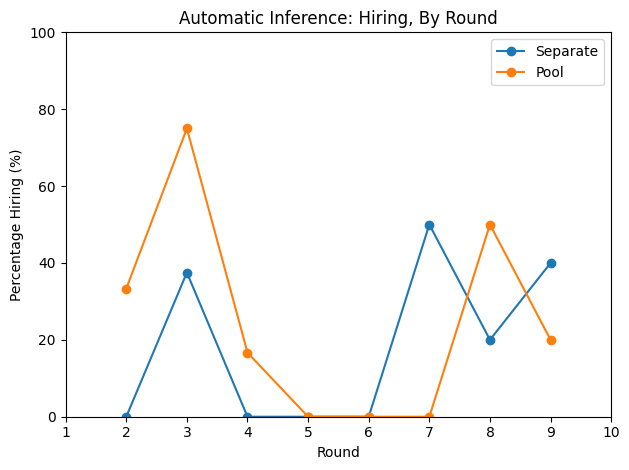

In [24]:
# for fig in range(2):
#  SEPARATE BAD
lengths = []
avgs_sep = []
for i in range(1, rounds_num+1):
    salient_sep = data_salient[(data_salient[f'EnvChoice_R{i}']==0) & (data_salient[f'Round{i}Param']>=7)]
    bonus_choice = salient_sep[f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    bonus_choice = bonus_choice.replace(2, 1) # Count hiring any computer
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
    lengths.append(len(bonus_choice))
# print(avgs_sep)
# plt.plot(range(1, rounds_num+1), avgs_sep, label=f'See Bad Quality N={lengths}', marker="o")
plt.plot(range(1, rounds_num+1), avgs_sep, label=f'Separate', marker="o")


    # #  SEPARATE GOOD
    # lengths = []
    # avgs_sep = []
    # for i in range(1, rounds_num+1):
    #     salient_sep = data_salient[(data_salient[f'EnvChoice_R{i}']==0) & (data_salient[f'Round{i}Param']<7)]
    #     bonus_choice = salient_sep[salient_sep[f'comp_type_R{i}']==1][f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    #     avg_separating = bonus_choice.mean()*100
    #     avgs_sep.append(avg_separating)
    #     lengths.append(len(bonus_choice))
    # # print(avgs_sep)
    # # plt.plot(range(1, rounds_num+1), avgs_sep, label=f'See Good Quality N={lengths}', marker="o")
    # plt.plot(range(1, rounds_num+1), avgs_sep, label=f'See Good Quality', marker="o")


# if fig>0:
#  POOL
avgs_pool = []
lengths = []
for i in range(1, rounds_num+1):
    salient_pool = data_salient[(data_salient[f'EnvChoice_R{i}']==1) & (data_salient[f'Round{i}Param']>=7)]
    bonus_choice = salient_pool[f'informational_cost.{i}.player.bonusChoice'].replace(3, 0)
    bonus_choice = bonus_choice.replace(2, 1) # Count hiring any computer
    avg_pooling = bonus_choice.mean()*100
    avgs_pool.append(avg_pooling)
#     print(det_pool[f'informational_cost.{i}.player.bonusChoice'], bonus_choice)
    lengths.append(len(bonus_choice))
# print(avgs_pool)
# plt.plot(range(1, rounds_num+1), avgs_pool, label=f'Pool N={lengths}', marker="o")
plt.plot(range(1, rounds_num+1), avgs_pool, label=f'Pool', marker="o")


plt.xlabel("Round")
plt.ylabel("Percentage Hiring (%)")
# plt.xlim(1, 5)
plt.xticks(np.arange(1,rounds_num+1), range(1, rounds_num+1))  # Set text labels.
plt.ylim(0, 100)
# plt.axvline(x=5.5, linewidth=2, color = 'k')
plt.legend()
plt.title(f'Automatic Inference: Hiring, By Round')
plt.tight_layout()
# plt.savefig(outputpath + 'salient_bonus_choice_by_round.png',dpi=1000)
# if fig==0:
plt.savefig(outputpath + 'salient_bonus_choice_by_round.png',dpi=1000)
plt.show()

### Strategy Method

[63.1578947368421, 33.33333333333333, 63.63636363636363, 66.66666666666666, 50.0, 84.61538461538461, 71.42857142857143, 72.72727272727273, 66.66666666666666, 84.21052631578947]


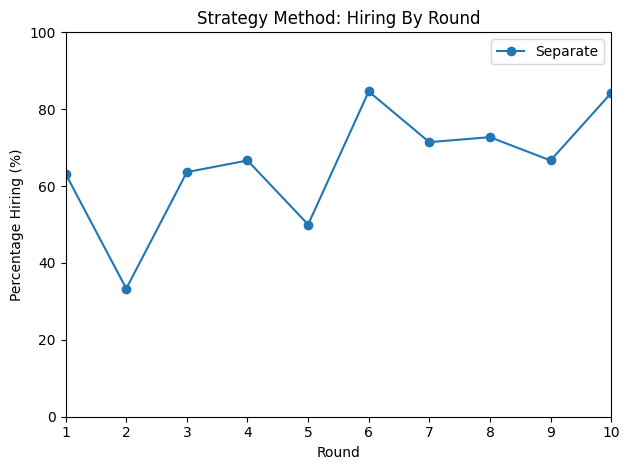

[63.1578947368421, 33.33333333333333, 63.63636363636363, 66.66666666666666, 50.0, 84.61538461538461, 71.42857142857143, 72.72727272727273, 66.66666666666666, 84.21052631578947]
[36.84210526315789, 11.11111111111111, 54.54545454545454, 25.0, 25.0, 38.46153846153847, 14.285714285714285, 54.54545454545454, 44.44444444444444, 21.052631578947366]


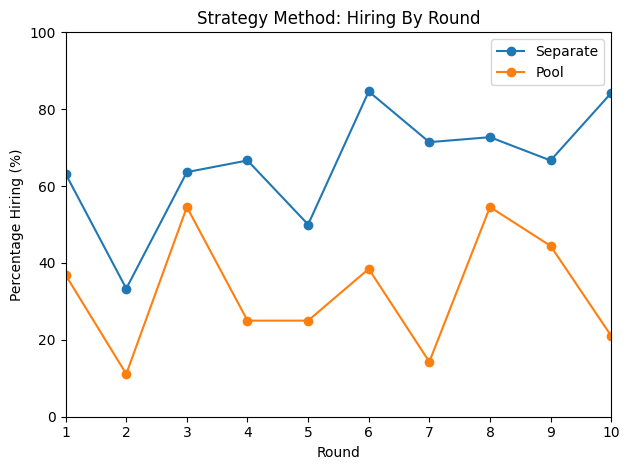

In [25]:
for fig in range(2):
    #  SEPARATE
    avgs_sep = []
    for i in range(1, rounds_num+1):
        bonus_choice = data_strategy[data_strategy[f'Round{i}Param']<7][f'strategy_method.{i}.player.bonusChoiceSep'].replace(3, 0)
        bonus_choice = bonus_choice.replace(2, 0) # Only count hiring Good computer
        avg_separating = bonus_choice.mean()*100
        avgs_sep.append(avg_separating)
    # lengths = len(bonus_choice)
    print(avgs_sep)
    plt.plot(range(1, rounds_num+1), avgs_sep, label='Separate', marker="o")

    # #  SEPARATE GOOD
    # avgs_sep = []
    # for i in range(1, rounds_num+1):
    #     bonus_choice = data_strategy[data_strategy[f'Round{i}Param']<7][f'strategy_method.{i}.player.bonusChoiceSep'].replace(3, 0)
    #     avg_separating = bonus_choice.mean()*100
    #     avgs_sep.append(avg_separating)
    # # lengths = len(bonus_choice)
    # print(avgs_sep)
    # plt.plot(range(1, rounds_num+1), avgs_sep, label='If Good Quality', marker="o")

    if fig>0:
        #  POOL
        avgs_pool = []
        for i in range(1, rounds_num+1):
            bonus_choice = data_strategy[data_strategy[f'Round{i}Param']<7][f'strategy_method.{i}.player.bonusChoicePool'].replace(3, 0)
            bonus_choice = bonus_choice.replace(2, 1) # Count hiring any computer
            avg_pooling = bonus_choice.mean()*100
            avgs_pool.append(avg_pooling)
        #     print(det_pool[f'informational_cost.{i}.player.bonusChoice'], bonus_choice)
        # lengths = len(bonus_choice)
        print(avgs_pool)
        plt.plot(range(1, rounds_num+1), avgs_pool, label='Pool', marker="o")

    plt.xlabel("Round")
    plt.ylabel("Percentage Hiring (%)")
    plt.xlim(1,  rounds_num)
    plt.xticks(np.arange(1, rounds_num+1), range(1, rounds_num+1))  # Set text labels.
    plt.ylim(0, 100)
    plt.legend()
    # plt.title(f'Strategy Method: Hiring By Round N={lengths}')
    plt.title(f'Strategy Method: Hiring By Round')
    plt.tight_layout()
    if fig == 0:
        plt.savefig(outputpath + 'strategy_bonus_choice_by_round.png',dpi=1000)
    plt.show()

[nan, 40.0, 25.0, 42.857142857142854, 53.333333333333336, 33.33333333333333, 41.66666666666667, 37.5, 40.0, nan]


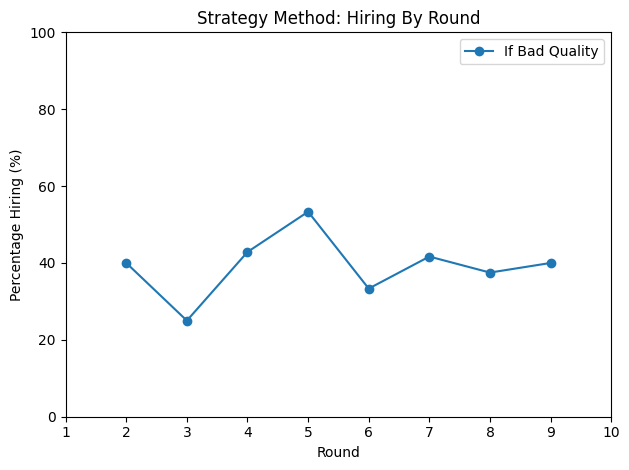

[nan, 40.0, 25.0, 42.857142857142854, 53.333333333333336, 33.33333333333333, 41.66666666666667, 37.5, 40.0, nan]
[nan, 20.0, 37.5, 14.285714285714285, 26.666666666666668, 16.666666666666664, 25.0, 12.5, 20.0, nan]


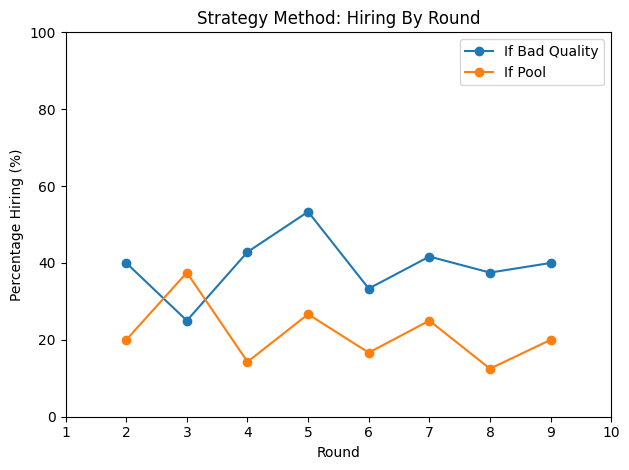

In [26]:
# Here it's optimal not to hire
for fig in range(2):
    #  SEPARATE BAD
    avgs_sep = []
    for i in range(1, rounds_num+1):
        bonus_choice = data_strategy[data_strategy[f'Round{i}Param']>=7][f'strategy_method.{i}.player.bonusChoiceSep'].replace(3, 0)
        bonus_choice = bonus_choice.replace(2, 1) # Count hiring any computer
        avg_separating = bonus_choice.mean()*100
        avgs_sep.append(avg_separating)
    # lengths = len(bonus_choice)
    print(avgs_sep)
    plt.plot(range(1, rounds_num+1), avgs_sep, label='If Bad Quality', marker="o")

    # #  SEPARATE GOOD
    # avgs_sep = []
    # for i in range(1, rounds_num+1):
    #     bonus_choice = data_strategy[data_strategy[f'Round{i}Param']>=7][f'strategy_method.{i}.player.bonusChoiceSep'].replace(3, 0)
    #     avg_separating = bonus_choice.mean()*100
    #     avgs_sep.append(avg_separating)
    # # lengths = len(bonus_choice)
    # print(avgs_sep)
    # plt.plot(range(1, rounds_num+1), avgs_sep, label='If Good Quality', marker="o")

    if fig>0:
        #  POOL
        avgs_pool = []
        for i in range(1, rounds_num+1):
            bonus_choice = data_strategy[data_strategy[f'Round{i}Param']>=7][f'strategy_method.{i}.player.bonusChoicePool'].replace(3, 0)
            bonus_choice = bonus_choice.replace(2, 1) # Count hiring any computer
            avg_pooling = bonus_choice.mean()*100
            avgs_pool.append(avg_pooling)
        #     print(det_pool[f'informational_cost.{i}.player.bonusChoice'], bonus_choice)
        # lengths = len(bonus_choice)
        print(avgs_pool)
        plt.plot(range(1, rounds_num+1), avgs_pool, label='If Pool', marker="o")

    plt.xlabel("Round")
    plt.ylabel("Percentage Hiring (%)")
    plt.xlim(1,  rounds_num)
    plt.xticks(np.arange(1, rounds_num+1), range(1, rounds_num+1))  # Set text labels.
    plt.ylim(0, 100)
    plt.legend()
    # plt.title(f'Strategy Method: Hiring By Round N={lengths}')
    plt.title(f'Strategy Method: Hiring By Round')
    plt.tight_layout()
    # if fig == 0:
    #     plt.savefig(outputpath + 'strategy_bonus_choice_by_round.png',dpi=1000)
    plt.show()

#### Let's condition on what they do in part 1

##### First, condition on what they'll actually will end up doing

In [ ]:
# for i in range(1,6):
#     myList = []
#     for ind in strategy.index:
#         myList.append(int(strategy[f'strategy_method.{i}.player.environment_choice'][ind]))
#     strategy[f'EnvChoice_R{i}'] = myList

[57.14285714285714, 22.22222222222222, 50.0, 10.0, 18.181818181818183, 16.666666666666664, 18.181818181818183, 40.0, 14.285714285714285, 75.0]
[81.81818181818183, 44.44444444444444, 62.5, 75.0, 57.14285714285714, 75.0, 71.42857142857143, 62.5, 54.54545454545454, 92.85714285714286]


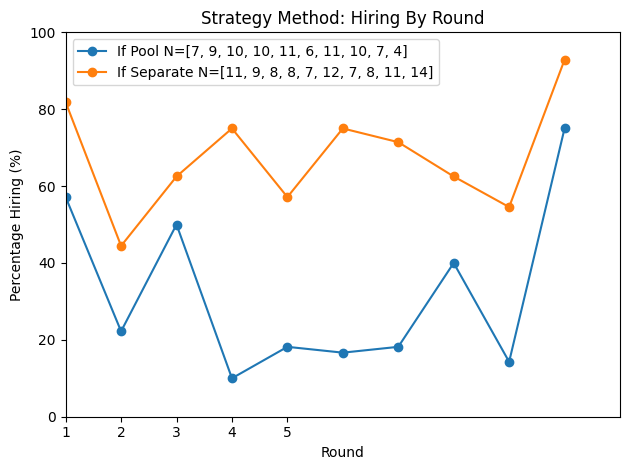

In [33]:
#  POOL
lengths = []
avgs_pool = []
for i in range(1,rounds_num+1):
    strategy_pool = data_strategy[data_strategy[f'EnvChoice_R{i}']==1]
    bonus_choice = strategy_pool[f'strategy_method.{i}.player.bonusChoicePool'].replace(3, 0)
    bonus_choice = bonus_choice.replace(2, 1) # Count hiring any computer
    avg_pooling = bonus_choice.mean()*100
    avgs_pool.append(avg_pooling)
#     print(det_pool[f'informational_cost.{i}.player.bonusChoice'], bonus_choice)
    lengths.append(len(bonus_choice))
print(avgs_pool)
plt.plot(range(1,rounds_num+1), avgs_pool, label=f'If Pool N={lengths}', marker="o")

#  SEPARATE BAD
lengths = []
avgs_sep = []
for i in range(1,rounds_num+1):
    strategy_sep = data_strategy[data_strategy[f'EnvChoice_R{i}']==0]
    bonus_choice = strategy_sep[f'strategy_method.{i}.player.bonusChoiceSep'].replace(3, 0)
    bonus_choice = bonus_choice.replace(2, 0) # Count hiring only Good computer
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
    lengths.append(len(bonus_choice))
print(avgs_sep)
plt.plot(range(1,rounds_num+1), avgs_sep, label=f'If Separate N={lengths}', marker="o")

# #  SEPARATE GOOD
# lengths = []
# avgs_sep = []
# for i in range(1,rounds_num+1):
#     strategy_sep = data_strategy[data_strategy[f'EnvChoice_R{i}']==0]
#     bonus_choice = strategy_sep[f'strategy_method.{i}.player.bonusChoiceSepGood'].replace(3, 0)
#     avg_separating = bonus_choice.mean()*100
#     avgs_sep.append(avg_separating)
#     lengths.append(len(bonus_choice))
# print(avgs_sep)
# plt.plot(range(1,rounds_num+1), avgs_sep, label=f'If Good Quality N={lengths}', marker="o")

plt.xlabel("Round")
plt.ylabel("Percentage Hiring (%)")
plt.xlim(1, rounds_num+1)
plt.xticks(np.arange(1,6), range(1,6))  # Set text labels.
plt.ylim(0, 100)
# plt.axvline(x=5.5, linewidth=2, color = 'k')
plt.legend()
plt.title('Strategy Method: Hiring By Round')
plt.tight_layout()
plt.savefig(outputpath + 'strategy_bonus_choice_by_round_matters.png',dpi=1000)
plt.show()

##### Now, check what those who pooled said they would have done if separating

[37.5, 20.0, 36.36363636363637, 45.45454545454545, 50.0, 57.14285714285714, 41.66666666666667, 45.45454545454545, 50.0, 60.0]


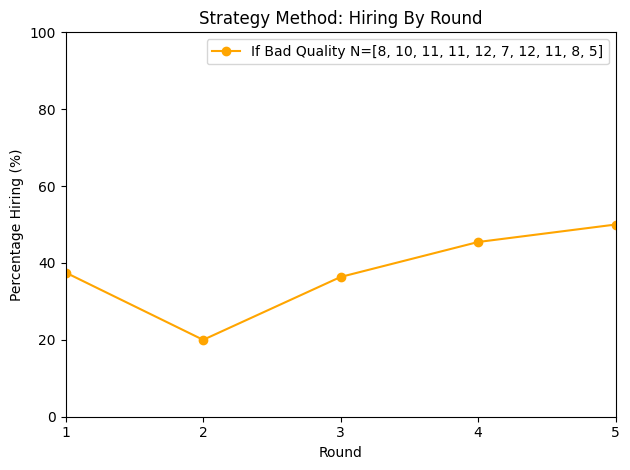

In [30]:
#  SEPARATE BAD
lengths = []
avgs_sep = []
for i in range(1,rounds_num+1):
    strategy_sep = data_strategy[data_strategy[f'EnvChoice_R{i}']==1]
    bonus_choice = strategy_sep[f'strategy_method.{i}.player.bonusChoiceSep'].replace(3, 0)
    bonus_choice = bonus_choice.replace(2, 0) # Count hiring only Good computer
    avg_separating = bonus_choice.mean()*100
    avgs_sep.append(avg_separating)
    lengths.append(len(bonus_choice))
print(avgs_sep)
plt.plot(range(1,rounds_num+1), avgs_sep, label=f'If Bad Quality N={lengths}', marker="o", color='orange')

# #  SEPARATE GOOD
# lengths = []
# avgs_sep = []
# for i in range(1,rounds_num+1):
#     strategy_sep = data_strategy[data_strategy[f'EnvChoice_R{i}']==1]
#     bonus_choice = strategy_sep[f'strategy_method.{i}.player.bonusChoiceSepGood'].replace(3, 0)
#     avg_separating = bonus_choice.mean()*100
#     avgs_sep.append(avg_separating)
#     lengths.append(len(bonus_choice))
# print(avgs_sep)
# plt.plot(range(1,rounds_num+1), avgs_sep, label=f'If Good Quality N={lengths}', marker="o", color='olive')

plt.xlabel("Round")
plt.ylabel("Percentage Hiring (%)")
plt.xlim(1, 5)
plt.xticks(np.arange(1,6), range(1,6))  # Set text labels.
plt.ylim(0, 100)
plt.axvline(x=5.5, linewidth=2, color = 'k')
plt.legend()
plt.title('Strategy Method: Hiring By Round')
plt.tight_layout()
plt.savefig(outputpath + 'strategy_bonus_choice_by_round_NOTmatters.png',dpi=1000)
plt.show()

### Let's see if some people always pool or always separate

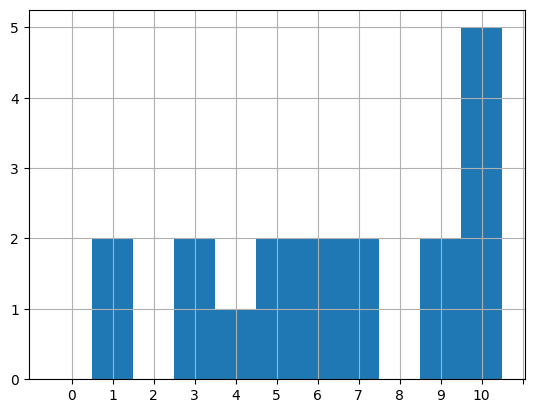

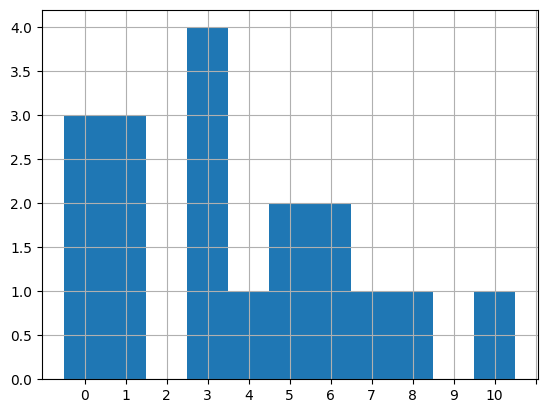

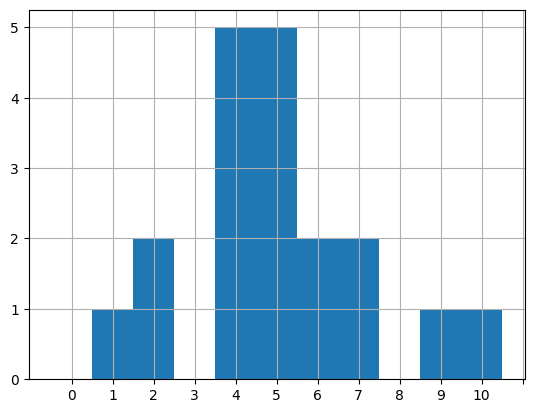

In [31]:
data_det['total_pool'] = data_det['EnvChoice_R1']+data_det['EnvChoice_R2']+data_det['EnvChoice_R3']+data_det['EnvChoice_R4']+data_det['EnvChoice_R5']+data_det['EnvChoice_R6']+\
                            data_det['EnvChoice_R7']+data_det['EnvChoice_R8']+data_det['EnvChoice_R9']+data_det['EnvChoice_R10']
data_det['total_pool'].hist(bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.xticks(np.arange(0,rounds_num+2), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', ''])  # Set text labels.
plt.show()
data_salient['total_pool'] = data_salient['EnvChoice_R1']+data_salient['EnvChoice_R2']+data_salient['EnvChoice_R3']+data_salient['EnvChoice_R4']+data_salient['EnvChoice_R5']+data_salient['EnvChoice_R6']+\
                            data_salient['EnvChoice_R7']+data_salient['EnvChoice_R8']+data_salient['EnvChoice_R9']+data_salient['EnvChoice_R10']
data_salient['total_pool'].hist(bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.xticks(np.arange(0,rounds_num+2), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', ''])  # Set text labels.
plt.show()
data_strategy['total_pool'] = data_strategy['EnvChoice_R1']+data_strategy['EnvChoice_R2']+data_strategy['EnvChoice_R3']+data_strategy['EnvChoice_R4']+data_strategy['EnvChoice_R5']+data_strategy['EnvChoice_R6']+\
                            data_strategy['EnvChoice_R7']+data_strategy['EnvChoice_R8']+data_strategy['EnvChoice_R9']+data_strategy['EnvChoice_R10']
data_strategy['total_pool'].hist(bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.xticks(np.arange(0,rounds_num+2), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', ''])  # Set text labels.
plt.show()

In [ ]:
# Drop everyone who always chooses the same task and repeat graphs for part 1
# data_det = data_det[(data_det['total_pool']>0) & (data_det['total_pool']<10)]
# data_salient = data_salient[(data_salient['total_pool']>0) & (data_salient['total_pool']<10)]
# data_strategy = data_strategy[(data_strategy['total_pool']>0) & (data_strategy['total_pool']<10)]
data_det = data_det[(data_det['total_pool']<10)]
data_salient = data_salient[(data_salient['total_pool']<10)]
data_strategy = data_strategy[(data_strategy['total_pool']<10)]

mist_det_sep = []
mist_det_pool = []
mist_salient_sep = []
mist_salient_pool = []
mist_strategy_sep = []
mist_strategy_pool = []
mist_strategy_sep2 = []
mist_strategy_pool2 = []
rounds_num = 10
lengths_det_sep=[]
lengths_det_pool=[]
lengths_salient_sep=[]
lengths_salient_pool=[]
lengths_strategy_sep=[]
lengths_strategy_pool=[]
lengths_strategy_sep2=[]
lengths_strategy_pool2=[]
print('5 params are Separating in deterministic in salient; 6 params are Separating in Strategy --- update this later!!!')

for i in range(1,rounds_num+1):
#   deterministic
    # det_sep = data_det[data_det[f'Round{i}Param']<7] # deterministic when separating is optimal
    # det_pool = data_det[data_det[f'Round{i}Param']>=6] # deterministic when pooling is optimal
    # det_risk = det[det[f'risk_taker_R{i}'] == 1] # this picks people who picked risky option in that round's lottery
    # det_risk = det_risk[det_risk[f'Round{i}Param'] != 5] # this kicks out those for whom pooling was optimal
    det_sep = data_det[data_det[f'Round{i}Param']<7] # deterministic when separating is optimal
    det_pool = data_det[data_det[f'Round{i}Param']>=6] # deterministic when pooling is optimal
    salient_sep = data_salient[data_salient[f'Round{i}Param']<7] # salient when separating is optimal
    salient_pool = data_salient[data_salient[f'Round{i}Param']>=6] # salient when pooling is optimal
    strategy_sep = data_strategy[data_strategy[f'Round{i}Param']<7] # strategy when separating is optimal
    strategy_pool = data_strategy[data_strategy[f'Round{i}Param']>=7] # strategy when pooling is optimal
    strategy_sep2 = data_strategy[(data_strategy[f'Round{i}Param']<7) & (data_strategy[f'strategy_method.{i}.player.bonusChoiceSepGood']==1) & (data_strategy[f'strategy_method.{i}.player.bonusChoiceSepBad']==3)] # strategy when separating is optimal
    strategy_pool2 = data_strategy[(data_strategy[f'Round{i}Param']>=7) & (data_strategy[f'strategy_method.{i}.player.bonusChoiceSepGood']==3) & (data_strategy[f'strategy_method.{i}.player.bonusChoiceSepBad']==3) & (data_strategy[f'strategy_method.{i}.player.bonusChoicePool']==3)] # strategy when pooling is optimal
    mist_environment = det_sep[f'informational_cost.{i}.player.environment_choice'].mean()*100
    mist_det_sep.append(mist_environment)
    lengths_det_sep.append(len(det_sep[det_sep[f'Round{i}Param']<7]))
    mist_environment = salient_sep[f'informational_cost.{i}.player.environment_choice'].mean()*100
    mist_salient_sep.append(mist_environment)
    lengths_salient_sep.append(len(salient_sep[salient_sep[f'Round{i}Param']<7]))
    mist_environment = strategy_sep[f'strategy_method.{i}.player.environment_choice'].mean()*100
    mist_strategy_sep.append(mist_environment)
    lengths_strategy_sep.append(len(strategy_sep[strategy_sep[f'Round{i}Param']<7]))
    mist_environment = strategy_sep2[f'strategy_method.{i}.player.environment_choice'].mean()*100
    mist_strategy_sep2.append(mist_environment)
    lengths_strategy_sep2.append(len(strategy_sep2[strategy_sep2[f'Round{i}Param']<7]))
    if i>1:
        mist_environment = (1-det_pool[f'informational_cost.{i}.player.environment_choice'].mean())*100
        mist_det_pool.append(mist_environment)
        lengths_det_pool.append(len(det_pool[det_pool[f'Round{i}Param']>=6]))
        mist_environment = (1-salient_pool[f'informational_cost.{i}.player.environment_choice'].mean())*100
        mist_salient_pool.append(mist_environment)
        lengths_salient_pool.append(len(salient_pool[salient_pool[f'Round{i}Param']>=6]))
        if i<rounds_num:
            mist_environment = (1-strategy_pool[f'strategy_method.{i}.player.environment_choice'].mean())*100
            mist_strategy_pool.append(mist_environment)
            lengths_strategy_pool.append(len(strategy_pool[strategy_pool[f'Round{i}Param']>=7]))
            mist_environment = (1-strategy_pool2[f'strategy_method.{i}.player.environment_choice'].mean())*100
            mist_strategy_pool2.append(mist_environment)
            lengths_strategy_pool2.append(len(strategy_pool2[strategy_pool2[f'Round{i}Param']>=7]))

# print(mist_strategy_pool2)
# print(mist_strategy_sep2)
# print(lengths_strategy_pool2)
# print(lengths_strategy_sep2)

# print('Chose risky in first round:', strategy[strategy['risk_taker_R1'] == 1]['risk_taker_R1'].count())
print('det:', mist_det_sep, 'Salient:', mist_salient_sep, 'Strategy:', mist_strategy_sep)

for fig in range(6): 
    # plt.plot(range(1,rounds_num+1), mist_det_sep, label=f'deterministic Sep N={lengths_det_sep}', marker="o")
    if fig<=2:
        plt.plot(range(1,rounds_num+1), mist_det_sep, label=f'deterministic Sep', marker="o")    # plt.plot(range(1,2), avgs_det, label=f'deterministic N={lengths_det[0]}', marker="o")
    if fig>0 and fig<=2:
        # plt.plot(range(1,rounds_num+1), mist_salient_sep, label=f'Salient Sep N={lengths_salient_sep}', marker="o")
        plt.plot(range(1,rounds_num+1), mist_salient_sep,  label=f'Automatic Inference Sep', marker="o")

    if fig>1 and fig<=2:
        # plt.plot(range(1,rounds_num+1), mist_salient_sep, label=f'Salient Sep N={lengths_salient_sep}', marker="o")
        plt.plot(range(1,rounds_num+1), mist_strategy_sep,  label=f'Strategy Sep', marker="o")

    # # plt.plot(range(1,2), avgs_salient, label=f'Salient N={lengths_salient[0]}', marker="o")
    if fig>2:
        # plt.plot(range(2,rounds_num+1), mist_det_pool, label=f'deterministic Pool N={lengths_det_pool}', marker="o")
        plt.plot(range(2,rounds_num+1), mist_det_pool, label=f'deterministic Pool', marker="o")

    if fig>3:
        # plt.plot(range(2,rounds_num+1), mist_salient_pool, label=f'Salient Pool N={lengths_salient_pool}', marker="o")
        plt.plot(range(2,rounds_num+1), mist_salient_pool, label=f'Automatic Inference Pool', marker="o")

    if fig>4:
        # plt.plot(range(2,rounds_num+1), mist_salient_pool, label=f'Salient Pool N={lengths_salient_pool}', marker="o")
        plt.plot(range(2,rounds_num), mist_strategy_pool, label=f'Strategy Pool', marker="o")

    # # plt.plot(range(1,rounds_num+1), avgs_strategy, label=f'Strategy Method N={lengths_strategy}', marker="o")
    # plt.plot(range(1,2), avgs_strategy, label=f'Strategy Method N={lengths_strategy[0]}', marker="o")

    plt.xlabel("Round")
    plt.ylabel("Percentage Mistake (%)")
    plt.xlim(0, rounds_num+1)
    plt.xticks(np.arange(0,rounds_num+2), ['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', ''])  # Set text labels.
    plt.ylim(0, 100)
    # plt.axvline(x=5.5, linewidth=2, color = 'k')
    # plt.axhline(y=avgs_det_avg, xmin=0,xmax=0.5, linewidth=1, color = 'k')
    # plt.text(2.5,avgs_det_avg+3,str(round(avgs_det_avg,1))+'%')
    # plt.text(0.85,avgs_det[0]+3,str(round(avgs_det[0]))+'%')
    # plt.text(0.85,avgs_salient[0]+3,str(round(avgs_salient[0]))+'%')
    # plt.text(0.85,avgs_strategy[0]-4,str(round(avgs_strategy[0]))+'%')

    # plt.axhline(y=avgs_sal_avg, xmin=0,xmax=0.5, linewidth=1, color = 'k')
    # plt.text(2.5,avgs_sal_avg-4,str(round(avgs_sal_avg,1))+'%')

    plt.legend()
    plt.title(f'Mistake Rate')
    plt.tight_layout()
    # plt.savefig(outputpath + 'environment_by_round_deterministic_R1.png',dpi=1000)
    # plt.savefig(outputpath + 'environment_by_round_deterministic.png',dpi=1000)
    # plt.savefig(outputpath + 'environment_by_round_salient_R1.png',dpi=1000)
    # plt.savefig(outputpath + 'environment_by_round_salient.png',dpi=1000)
    # plt.savefig(outputpath + 'environment_by_round_strategy_R1.png',dpi=1000)
    # plt.savefig(outputpath + 'environment_by_round_strategy.png',dpi=1000)
    # if fig==0:
    #     plt.savefig(outputpath + 'environment_by_round_deterministic_sep.png',dpi=1000)
    # if fig==1:
    #     plt.savefig(outputpath + 'environment_by_round_deterministic_salient_sep.png',dpi=1000)
    # if fig==2:
    #     plt.savefig(outputpath + 'environment_by_round_deterministic_salient_strategy_sep.png',dpi=1000)
    # if fig==3:
    #     plt.savefig(outputpath + 'environment_by_round_deterministic_pool.png',dpi=1000)
    # if fig==4:
    #     plt.savefig(outputpath + 'environment_by_round_deterministic_salient_pool.png',dpi=1000)
    # if fig==5:
    #     plt.savefig(outputpath + 'environment_by_round_deterministic_salient_strategy_pool.png',dpi=1000)
    plt.show()

plt.plot([1], mist_det_sep[0], label=f'deterministic Sep', marker="o")
plt.xlabel("Round")
plt.ylabel("Percentage Mistake (%)")
plt.xlim(0, rounds_num+1)
plt.xticks(np.arange(0,rounds_num+2), ['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', ''])  # Set text labels.
plt.ylim(0, 100)
plt.text(1,mist_det_sep[0]+3,str(round(mist_det_sep[0]))+'%')
plt.legend()
plt.title(f'Mistake Rate')
plt.tight_layout()
# plt.savefig(outputpath + 'environment_round_1_deterministic_sep.png',dpi=1000)
plt.show()

plt.plot([1], mist_det_sep[0], label=f'deterministic Sep', marker="o")
plt.plot([1], mist_salient_sep[0], label=f'Automatic Inference Sep', marker="o")
plt.xlabel("Round")
plt.ylabel("Percentage Mistake (%)")
plt.xlim(0, rounds_num+1)
plt.xticks(np.arange(0,rounds_num+2), ['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', ''])  # Set text labels.
plt.ylim(0, 100)
plt.text(1,mist_det_sep[0]+3,str(round(mist_det_sep[0]))+'%')
plt.text(1,mist_salient_sep[0]+3,str(round(mist_salient_sep[0]))+'%')
plt.legend()
plt.title(f'Mistake Rate')
plt.tight_layout()
# plt.savefig(outputpath + 'environment_round_1_salient_sep.png',dpi=1000)
plt.show()

plt.plot([1], mist_det_sep[0], label=f'deterministic Sep', marker="o")
plt.plot([1], mist_salient_sep[0], label=f'Automatic Inference Sep', marker="o")
plt.plot([1], mist_strategy_sep[0], label=f'Strategy Sep', marker="o")
plt.xlabel("Round")
plt.ylabel("Percentage Mistake (%)")
plt.xlim(0, rounds_num+1)
plt.xticks(np.arange(0,rounds_num+2), ['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', ''])  # Set text labels.
plt.ylim(0, 100)
plt.text(1,mist_det_sep[0]+3,str(round(mist_det_sep[0]))+'%')
plt.text(1,mist_salient_sep[0]+3,str(round(mist_salient_sep[0]))+'%')
plt.text(1,mist_strategy_sep[0]+3,str(round(mist_strategy_sep[0]))+'%')
plt.legend()
plt.title(f'Mistake Rate')
plt.tight_layout()
# plt.savefig(outputpath + 'environment_round_1_strategy_sep.png',dpi=1000)
plt.show()

plt.xlabel("Round")
plt.ylabel("Percentage Mistake (%)")
plt.xlim(0, rounds_num+1)
plt.xticks(np.arange(0,rounds_num+2), ['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', ''])  # Set text labels.
plt.ylim(0, 100)
plt.title(f'Mistake Rate Conditional on Optimal Part 2')
plt.tight_layout()
plt.plot(range(2,rounds_num), mist_strategy_pool2, label=f'Strategy Pool', marker="o")
plt.plot(range(1,rounds_num+1), mist_strategy_sep2, label=f'Strategy Sep', marker="o")
plt.legend()
# plt.savefig(outputpath + 'environment_by_round_strategy_opt_part2.png',dpi=1000)
plt.show()

### deterministic: Check if there is a group of people who always pool, or people going in and out

In [ ]:
det['cum_mistakes_R1'] = np.nan
det['cum_mistakes_R2'] = np.nan
det['cum_mistakes_R3'] = np.nan
det['cum_mistakes_R4'] = np.nan
det['cum_mistakes_R5'] = np.nan
for ind in det.index:
    if det['risk_taker_R1'][ind] == 1 and det['Round1Param'][ind] != 5:
        det['cum_mistakes_R1'][ind] = det['EnvChoice_R1'][ind]
    else:
        det['cum_mistakes_R1'][ind] = 0
    if det['risk_taker_R2'][ind] == 1 and det['Round2Param'][ind] != 5:
        det['cum_mistakes_R2'][ind] = det['cum_mistakes_R1'][ind] + det['EnvChoice_R2'][ind]
    else:
        det['cum_mistakes_R2'][ind] = det['cum_mistakes_R1'][ind]
    if det['risk_taker_R3'][ind] == 1 and det['Round3Param'][ind] != 5:
        det['cum_mistakes_R3'][ind] = det['cum_mistakes_R2'][ind] + det['EnvChoice_R3'][ind]
    else:
        det['cum_mistakes_R3'][ind] = det['cum_mistakes_R2'][ind]
    if det['risk_taker_R4'][ind] == 1 and det['Round4Param'][ind] != 5:
        det['cum_mistakes_R4'][ind] = det['cum_mistakes_R3'][ind] + det['EnvChoice_R4'][ind]
    else:
        det['cum_mistakes_R4'][ind] = det['cum_mistakes_R3'][ind]
    if det['risk_taker_R5'][ind] == 1 and det['Round5Param'][ind] != 5:
        det['cum_mistakes_R5'][ind] = det['cum_mistakes_R4'][ind] + det['EnvChoice_R5'][ind]
    else:
        det['cum_mistakes_R5'][ind] = det['cum_mistakes_R4'][ind]        

print(det[['cum_mistakes_R1', 'cum_mistakes_R2','cum_mistakes_R3', 'cum_mistakes_R4','cum_mistakes_R5']])

     cum_mistakes_R1  cum_mistakes_R2  cum_mistakes_R3  cum_mistakes_R4  \
179              0.0              0.0              1.0              1.0   
181              1.0              2.0              2.0              2.0   
182              1.0              1.0              2.0              3.0   
232              1.0              1.0              1.0              1.0   
237              1.0              2.0              3.0              3.0   
239              1.0              2.0              2.0              2.0   
243              0.0              0.0              0.0              0.0   
247              1.0              2.0              2.0              2.0   
248              0.0              0.0              0.0              0.0   
252              1.0              2.0              2.0              3.0   
253              1.0              2.0              3.0              4.0   
255              0.0              0.0              1.0              2.0   
257              1.0     

In [ ]:
for i in range(1,6):
    print(det[det['cum_mistakes_R5']==4][f'informational_cost.{i}.player.bonusChoice'])

182    1.0
252    1.0
253    1.0
279    1.0
305    3.0
Name: informational_cost.1.player.bonusChoice, dtype: float64
182    3.0
252    3.0
253    1.0
279    3.0
305    3.0
Name: informational_cost.2.player.bonusChoice, dtype: float64
182    1.0
252    3.0
253    1.0
279    3.0
305    3.0
Name: informational_cost.3.player.bonusChoice, dtype: float64
182    1.0
252    3.0
253    1.0
279    3.0
305    1.0
Name: informational_cost.4.player.bonusChoice, dtype: float64
182    3.0
252    3.0
253    1.0
279    3.0
305    3.0
Name: informational_cost.5.player.bonusChoice, dtype: float64


In [ ]:
det_pool1 = det_all[det_all['EnvChoice1']==1]
det_sep_good1 = det_all[(det_all['EnvChoice1']==0) & (det_all['RoundCounts1CompType']==1)]
det_sep_bad1 = det_all[(det_all['EnvChoice1']==0) & (det_all['RoundCounts1CompType']==0)]
det_pool2 = det_all[det_all['EnvChoice2']==1]
det_sep_good2 = det_all[(det_all['EnvChoice2']==0) & (det_all['RoundCounts2CompType']==1)]
det_sep_bad2 = det_all[(det_all['EnvChoice2']==0) & (det_all['RoundCounts2CompType']==0)]
det_sep_bad2
#%%
# Those who pool in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in det_pool1['informational_cost.5.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'det - Part 2 (pool, first) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + deterministic['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who pool in second part 2
fig, ax = plt.subplots()
y = [int(i) for i in det_pool2['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'det - Part 2 (pool, second) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + deterministic['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Good in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in det_sep_good1['informational_cost.5.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'det - Part 2 (separate, good, first) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + deterministic['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Good in second part 2
fig, ax = plt.subplots()
y = [int(i) for i in det_sep_good2['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'det - Part 2 (separate, good, second) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + deterministic['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Bad in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in det_sep_bad1['informational_cost.5.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'det - Part 2 (separate, bad, first) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + deterministic['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Bad in second part 2
fig, ax = plt.subplots()
y = [int(i) for i in det_sep_bad2['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'det - Part 2 (separate, bad, second) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + deterministic['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

NameError: name 'base_all' is not defined

### Salient part 2

In [ ]:
#%%
salient_all = data[data['participant.treatment']=='salient']
for ind in salient_all.index:
    salient_all['participant.chosen_decisions'][ind] = int(salient_all['participant.chosen_decisions'][ind][0])
salient_all = salient_all[(salient_all['participant.chosen_decisions']<7)]
#%%
myList = []
for ind in salient_all.index:
    myList.append(int(salient_all['participant.compType'][ind][int(salient_all['participant.chosen_decisions'][ind])-1]))
    # print(myList,  data['participant.compType'])
salient_all['RoundCounts1CompType'] = myList
#%%
myList = []
for ind in salient_all.index:
    r1 = int(salient_all['participant.chosen_decisions'][ind])
    myList.append(int(salient_all[f'informational_cost.{r1}.player.environment_choice'][ind]))
    # print(myList,  data['participant.compType'])
salient_all['EnvChoice1'] = myList
#%%
salient_pool = salient_all[salient_all['EnvChoice1']==1]
salient_sep_good = salient_all[(salient_all['EnvChoice1']==0) & (salient_all['RoundCounts1CompType']==1)]
salient_sep_bad = salient_all[(salient_all['EnvChoice1']==0) & (salient_all['RoundCounts1CompType']==0)]
#%%
# Those who pool in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in salient_pool['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Salient - Part 2 (pool) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + deterministic['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Good in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in salient_sep_good['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Salient - Part 2 (separate, good) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + deterministic['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Bad in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in salient_sep_bad['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Salient - Part 2 (separate, bad) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + deterministic['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

### Deterministic part 2

In [ ]:
#%%
det_all = data[(data['participant.treatment'] == 'deterministic')]
for ind in det_all.index:
    det_all['participant.chosen_decisions'][ind] = int(det_all['participant.chosen_decisions'][ind][0])
det_all = det_all[(det_all['participant.chosen_decisions']<7)]

myList = []
for ind in det_all.index:
    r1 = int(det_all['participant.chosen_decisions'][ind])
    myList.append(int(det_all[f'informational_cost.{r1}.player.environment_choice'][ind]))
    # print(myList,  data['participant.compType'])
det_all['EnvChoice1'] = myList
det_pool = det_all[det_all['EnvChoice1'] == 1]
det_sep = det_all[det_all['EnvChoice1'] == 0]
#%%
# Those who pool in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in det_pool['informational_cost.10.player.bonusChoice']]
xLabels = ['', 'Good', 'Bad', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Deterministic - Part 2 (pool) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + deterministic['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in det_sep['informational_cost.10.player.bonusChoice']]
xLabels = ['', 'Good', 'Bad', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Deterministic - Part 2 (separate) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + deterministic['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()